# Combining databases and pangea

In [1]:
# read in the data
import pandas as pd
import numpy as np 

relevant_mapping = pd.read_csv('validate_with_databases/revelant_mapping_split_by_cancer.csv', index_col=0)
database_lncRNAs = pd.read_csv('validate_with_databases/data_lncRNA_beta_and_regulation_split_by_cancer_with_hallmarks.csv', index_col=0)
pangea_lncRNAs = pd.read_csv('pangea/pangea_genes_and_hallmark_relations.csv', index_col=0)
relevant_mapping
database_lncRNAs
pangea_lncRNAs


,probe,ensembl_gene_id,gene_name,Normal,BLCA,BRCA,COAD,ESCA,HNSC,KIRC,KIRP,LIHC,LUAD,LUSC,PRAD,THCA,UCEC
0,cg00000029,ENSG00000103479,RBL2,0.293909,0.152679,0.180191,0.170377,0.249138,0.307872,0.561115,0.442395,0.343020,0.288188,0.227644,0.122436,0.250243,0.165088
1,cg00000289,ENSG00000072110,ACTN1,0.724539,0.659147,0.685562,0.708724,0.667277,0.724788,0.698170,0.714985,0.652744,0.628922,0.678161,0.679569,0.735080,0.723023
2,cg13777668,ENSG00000072110,ACTN1,0.638519,0.646603,0.742293,0.383604,0.480945,0.501602,0.493609,0.355280,0.327215,0.710296,0.571500,0.547105,0.487402,0.760323
3,cg18585512,ENSG00000072110,ACTN1,0.886235,0.840123,0.882834,0.856361,0.832958,0.854214,0.876041,0.886953,0.871542,0.827168,0.845330,0.871362,0.898254,0.874825
4,cg00001349,ENSG00000143194,MAEL,0.825592,0.841575,0.838310,0.838602,0.845569,0.820113,0.863124,0.907408,0.856767,0.814911,0.782079,0.866835,0.805691,0.828635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,cg18084450,ENSG00000284770,TBCE,0.034884,0.034911,0.033703,0.036529,0.034377,0.035022,0.032782,0.034195,0.035641,0.070123,0.034084,0.033611,0.033555,0.034918
4002,cg01819912,ENSG00000284770,TBCE,0.778392,0.766018,0.818847,0.622283,0.819900,0.946618,0.916750,0.932804,0.257004,0.774023,0.908629,0.608508,0.675009,0.906396
4003,cg18084450,ENSG00000282984,TBCE,0.034884,0.034911,0.033703,0.036529,0.034377,0.035022,0.032782,0.034195,0.035641,0.070123,0.034084,0.033611,0.033555,0.034918
4004,cg01819912,ENSG00000282984,TBCE,0.778392,0.766018,0.818847,0.622283,0.819900,0.946618,0.916750,0.932804,0.257004,0.774023,0.908629,0.608508,0.675009,0.906396


,lncRNA,num_up_regulated,num_down_regulated,Normal_mean,BLCA_mean,BRCA_mean,COAD_mean,ESCA_mean,HNSC_mean,KIRC_mean,...,EMT,immun,cell cycle progression,oncogen,tumor suppress,growth arrest,metaboli,autophag,angiogenesis,prognosis
0,FENDRR,0,17,0.150327,0.233614,0.125174,0.497928,0.345182,0.311720,0.093627,...,0,1,0,1,0,1,0,0,0,1
1,MIR155HG,5,2,0.018837,0.032774,0.053177,0.022943,0.023924,0.021854,0.018237,...,1,0,0,0,1,0,0,0,0,0
2,HOXA10-AS,3,0,0.083531,0.168411,0.215638,0.045964,0.061428,0.056320,0.055679,...,1,0,0,1,0,0,0,0,0,0
3,LINC01096,1,0,0.100355,0.086079,0.141014,0.110568,0.108286,0.088498,0.115660,...,0,0,0,0,0,0,0,0,0,0
4,ZNF750,0,4,0.872749,0.575780,0.622619,0.764322,0.806261,0.793589,0.945498,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,ZFHX4-AS1,1,0,0.766515,0.501966,0.774352,0.473385,0.611804,0.657230,0.725524,...,0,0,0,0,0,0,0,0,0,0
116,ID2-AS1,0,1,0.033502,0.032958,0.032025,0.035485,0.031133,0.033926,0.030371,...,0,0,0,0,0,0,0,0,0,0
117,SOX2,2,0,0.031184,0.030708,0.035240,0.050303,0.030586,0.028688,0.031640,...,1,0,0,0,0,0,0,0,0,0
118,SOX2-OT,7,0,0.081243,0.172528,0.107685,0.190108,0.270755,0.299801,0.059507,...,0,0,0,2,0,0,0,0,0,0


,methylat,metasta,prolifer,invasi,apoptosis,migrat,growth,cell cycle arrest,cell cycle,EMT,immun,tumor suppress,angiogenesis,oncogen,cell cycle progression,autophag,metaboli,prognosis
a1bg-as1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ac083880.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
adamts9-as1,0,0,3,2,0,2,2,0,0,1,0,0,0,1,0,0,0,0
azin1-as1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
cahm,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vim-as1,0,2,2,2,2,3,3,0,1,2,0,0,0,0,0,0,0,0
zeb1-as1,3,21,26,19,12,17,12,0,3,8,4,0,0,25,0,1,0,0
zfas1,0,24,34,25,18,24,15,0,9,8,5,7,1,37,3,0,0,0
zfhx4-as1,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0


In [2]:
# how many unique lncRNAs with hallmarks we should end up with:
len(set(database_lncRNAs['lncRNA'].str.lower()).union(set(list(pangea_lncRNAs.index))))

142

In [3]:
# adding methylation info into pangea lncRNAs

# set(database_lncRNAs['lncRNA'].str.lower()).difference(set(list(pangea_lncRNAs.index)))
lncRNAs_to_add = set(list(pangea_lncRNAs.index)).difference(set(database_lncRNAs['lncRNA'].str.lower()))
# len(set(database_lncRNAs['lncRNA'].str.lower()).union(set(list(pangea_lncRNAs.index))))
len(set(database_lncRNAs['lncRNA'].str.lower()).intersection(set(list(pangea_lncRNAs.index))))



cols = []
cols.extend(relevant_mapping.columns[3:17] + '_mean')
cols.extend(relevant_mapping.columns[3:17] + '_std')

lncRNA_and_beta_values = pd.DataFrame(columns = ['lncRNA'] + cols)

for lncRNA in lncRNAs_to_add:
    beta_values = relevant_mapping[relevant_mapping['gene_name'].str.lower() == lncRNA][relevant_mapping.columns[3:17]].values
    means_per_cancer = np.mean(beta_values, axis = 0)
    stds_per_cancer = np.std(beta_values, axis = 0)
    row = [lncRNA]
    row.extend(means_per_cancer)
    row.extend(stds_per_cancer)
    keys = ['lncRNA'] + cols
    row = {k:v for k, v in zip(keys, row)}
    lncRNA_and_beta_values = lncRNA_and_beta_values.append(row, ignore_index =True)  
    
lncRNA_and_beta_values

83

,lncRNA,Normal_mean,BLCA_mean,BRCA_mean,COAD_mean,ESCA_mean,HNSC_mean,KIRC_mean,KIRP_mean,LIHC_mean,...,ESCA_std,HNSC_std,KIRC_std,KIRP_std,LIHC_std,LUAD_std,LUSC_std,PRAD_std,THCA_std,UCEC_std
0,ac083880.1,0.086149,0.074933,0.079704,0.086477,0.066453,0.078657,0.084371,0.076862,0.074769,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,linc01833,0.203456,0.463150,0.439575,0.469926,0.431719,0.373220,0.254268,0.287255,0.315094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,mrps30-dt,0.043376,0.048717,0.048252,0.047271,0.055206,0.042904,0.041349,0.049468,0.056461,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,linc01924,0.634848,0.514625,0.753678,0.519635,0.499591,0.519337,0.488444,0.407746,0.455847,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,map3k14-as1,0.923494,0.870105,0.916514,0.902480,0.844226,0.849533,0.881377,0.923820,0.751619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,sox1-ot,0.107148,0.342099,0.303580,0.515450,0.488038,0.502275,0.143980,0.132384,0.186138,...,0.135261,0.090623,0.081180,0.079214,0.069413,0.118918,0.125980,0.118249,0.088103,0.301012
6,tdrkh-as1,0.078844,0.066358,0.068088,0.077615,0.086612,0.129170,0.085490,0.062022,0.068145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,hmga2-as1,0.880456,0.290569,0.621434,0.887338,0.667033,0.510299,0.893507,0.931700,0.564626,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,igbp1-as1,0.766005,0.819851,0.664806,0.764594,0.824957,0.844224,0.816939,0.886745,0.833084,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,linc00303,0.934309,0.834497,0.913853,0.864219,0.874685,0.852582,0.934401,0.936573,0.817152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# now adding onto database lncRNAs
database_lncRNAs['lncRNA'] = database_lncRNAs['lncRNA'].str.lower()

all_lncRNAs_df = database_lncRNAs.append(lncRNA_and_beta_values, sort = False, ignore_index = True)

In [5]:
# all_lncRNAs_df
(all_lncRNAs_df['lncRNA'].unique() == all_lncRNAs_df['lncRNA']).mean() # should be 1

hallmarks = ['methylat', 'metasta', 'prolifer', 'invasi',
           'apoptosis', 'migrat', 'growth', 'cell cycle arrest', 'cell cycle',
           'EMT', 'immun', 'tumor suppress', 'angiogenesis', 'oncogen',
           'cell cycle progression', 'autophag', 'metaboli', 'prognosis']

# adding in hallmark info we got from pangea
for p_lncRNA in pangea_lncRNAs.index:
    for hm in pangea_lncRNAs.columns:
        if pangea_lncRNAs.loc[p_lncRNA, hm] != 0:
            p_lncRNA
            hm
            pangea_lncRNAs.loc[p_lncRNA, hm]
            val = float(all_lncRNAs_df.loc[all_lncRNAs_df['lncRNA'] == p_lncRNA, hm]) # what it currently is in all_lncRNAs_df
            val
            if np.isnan(val):
                all_lncRNAs_df.loc[all_lncRNAs_df['lncRNA'] == p_lncRNA, hm] = pangea_lncRNAs.loc[p_lncRNA, hm]
            else:
                all_lncRNAs_df.loc[all_lncRNAs_df['lncRNA'] == p_lncRNA, hm] = val + pangea_lncRNAs.loc[p_lncRNA, hm]
            all_lncRNAs_df.loc[all_lncRNAs_df['lncRNA'] == p_lncRNA, hm]
            print("done")
            
# now replacing all leftover nan with 0  
all_lncRNAs_df[hallmarks] = all_lncRNAs_df[hallmarks].fillna(0)
# all_lncRNAs_df = all_lncRNAs_df.fillna(0)

1.0

'a1bg-as1'

'prolifer'

1

1.0

101    2.0
Name: prolifer, dtype: float64

done


'a1bg-as1'

'invasi'

1

1.0

101    2.0
Name: invasi, dtype: float64

done


'a1bg-as1'

'migrat'

1

1.0

101    2.0
Name: migrat, dtype: float64

done


'ac083880.1'

'immun'

1

nan

120    1.0
Name: immun, dtype: float64

done


'adamts9-as1'

'prolifer'

3

2.0

74    5.0
Name: prolifer, dtype: float64

done


'adamts9-as1'

'invasi'

2

0.0

74    2.0
Name: invasi, dtype: float64

done


'adamts9-as1'

'migrat'

2

0.0

74    2.0
Name: migrat, dtype: float64

done


'adamts9-as1'

'growth'

2

1.0

74    3.0
Name: growth, dtype: float64

done


'adamts9-as1'

'EMT'

1

0.0

74    1.0
Name: EMT, dtype: float64

done


'adamts9-as1'

'oncogen'

1

0.0

74    1.0
Name: oncogen, dtype: float64

done


'azin1-as1'

'methylat'

1

nan

139    1.0
Name: methylat, dtype: float64

done


'azin1-as1'

'metasta'

1

nan

139    1.0
Name: metasta, dtype: float64

done


'azin1-as1'

'prolifer'

1

nan

139    1.0
Name: prolifer, dtype: float64

done


'azin1-as1'

'invasi'

1

nan

139    1.0
Name: invasi, dtype: float64

done


'azin1-as1'

'migrat'

1

nan

139    1.0
Name: migrat, dtype: float64

done


'azin1-as1'

'growth'

1

nan

139    1.0
Name: growth, dtype: float64

done


'cahm'

'methylat'

1

1.0

67    2.0
Name: methylat, dtype: float64

done


'cahm'

'prolifer'

1

0.0

67    1.0
Name: prolifer, dtype: float64

done


'cahm'

'invasi'

1

0.0

67    1.0
Name: invasi, dtype: float64

done


'casc11'

'metasta'

2

3.0

89    5.0
Name: metasta, dtype: float64

done


'casc11'

'prolifer'

12

8.0

89    20.0
Name: prolifer, dtype: float64

done


'casc11'

'invasi'

8

5.0

89    13.0
Name: invasi, dtype: float64

done


'casc11'

'apoptosis'

5

3.0

89    8.0
Name: apoptosis, dtype: float64

done


'casc11'

'migrat'

7

4.0

89    11.0
Name: migrat, dtype: float64

done


'casc11'

'growth'

2

2.0

89    4.0
Name: growth, dtype: float64

done


'casc11'

'cell cycle'

1

1.0

89    2.0
Name: cell cycle, dtype: float64

done


'casc11'

'EMT'

2

0.0

89    2.0
Name: EMT, dtype: float64

done


'casc11'

'oncogen'

5

0.0

89    5.0
Name: oncogen, dtype: float64

done


'casc15'

'metasta'

10

7.0

34    17.0
Name: metasta, dtype: float64

done


'casc15'

'prolifer'

23

15.0

34    38.0
Name: prolifer, dtype: float64

done


'casc15'

'invasi'

21

14.0

34    35.0
Name: invasi, dtype: float64

done


'casc15'

'apoptosis'

11

6.0

34    17.0
Name: apoptosis, dtype: float64

done


'casc15'

'migrat'

16

12.0

34    28.0
Name: migrat, dtype: float64

done


'casc15'

'growth'

7

5.0

34    12.0
Name: growth, dtype: float64

done


'casc15'

'cell cycle arrest'

1

1.0

34    2.0
Name: cell cycle arrest, dtype: float64

done


'casc15'

'cell cycle'

3

2.0

34    5.0
Name: cell cycle, dtype: float64

done


'casc15'

'EMT'

5

3.0

34    8.0
Name: EMT, dtype: float64

done


'casc15'

'immun'

2

2.0

34    4.0
Name: immun, dtype: float64

done


'casc15'

'tumor suppress'

2

0.0

34    2.0
Name: tumor suppress, dtype: float64

done


'casc15'

'oncogen'

11

0.0

34    11.0
Name: oncogen, dtype: float64

done


'casc15'

'cell cycle progression'

1

0.0

34    1.0
Name: cell cycle progression, dtype: float64

done


'ccnd2-as1'

'methylat'

1

0.0

87    1.0
Name: methylat, dtype: float64

done


'ccnd2-as1'

'prolifer'

4

2.0

87    6.0
Name: prolifer, dtype: float64

done


'ccnd2-as1'

'invasi'

2

1.0

87    3.0
Name: invasi, dtype: float64

done


'ccnd2-as1'

'migrat'

2

1.0

87    3.0
Name: migrat, dtype: float64

done


'ccnd2-as1'

'growth'

2

1.0

87    3.0
Name: growth, dtype: float64

done


'ccnd2-as1'

'cell cycle'

1

0.0

87    1.0
Name: cell cycle, dtype: float64

done


'ccnd2-as1'

'cell cycle progression'

1

0.0

87    1.0
Name: cell cycle progression, dtype: float64

done


'dlx6-as1'

'methylat'

4

1.0

97    5.0
Name: methylat, dtype: float64

done


'dlx6-as1'

'metasta'

19

10.0

97    29.0
Name: metasta, dtype: float64

done


'dlx6-as1'

'prolifer'

35

21.0

97    56.0
Name: prolifer, dtype: float64

done


'dlx6-as1'

'invasi'

27

18.0

97    45.0
Name: invasi, dtype: float64

done


'dlx6-as1'

'apoptosis'

15

6.0

97    21.0
Name: apoptosis, dtype: float64

done


'dlx6-as1'

'migrat'

25

17.0

97    42.0
Name: migrat, dtype: float64

done


'dlx6-as1'

'growth'

20

9.0

97    29.0
Name: growth, dtype: float64

done


'dlx6-as1'

'cell cycle'

4

4.0

97    8.0
Name: cell cycle, dtype: float64

done


'dlx6-as1'

'EMT'

7

4.0

97    11.0
Name: EMT, dtype: float64

done


'dlx6-as1'

'immun'

6

0.0

97    6.0
Name: immun, dtype: float64

done


'dlx6-as1'

'oncogen'

21

2.0

97    23.0
Name: oncogen, dtype: float64

done


'dlx6-as1'

'cell cycle progression'

1

1.0

97    2.0
Name: cell cycle progression, dtype: float64

done


'dlx6-as1'

'metaboli'

1

0.0

97    1.0
Name: metaboli, dtype: float64

done


'draic'

'metasta'

2

0.0

107    2.0
Name: metasta, dtype: float64

done


'draic'

'prolifer'

2

0.0

107    2.0
Name: prolifer, dtype: float64

done


'draic'

'invasi'

5

1.0

107    6.0
Name: invasi, dtype: float64

done


'draic'

'apoptosis'

1

0.0

107    1.0
Name: apoptosis, dtype: float64

done


'draic'

'migrat'

2

1.0

107    3.0
Name: migrat, dtype: float64

done


'draic'

'growth'

4

2.0

107    6.0
Name: growth, dtype: float64

done


'draic'

'EMT'

1

0.0

107    1.0
Name: EMT, dtype: float64

done


'draic'

'immun'

2

1.0

107    3.0
Name: immun, dtype: float64

done


'draic'

'oncogen'

1

1.0

107    2.0
Name: oncogen, dtype: float64

done


'draic'

'autophag'

1

0.0

107    1.0
Name: autophag, dtype: float64

done


'emx2os'

'metasta'

1

0.0

17    1.0
Name: metasta, dtype: float64

done


'emx2os'

'prolifer'

2

1.0

17    3.0
Name: prolifer, dtype: float64

done


'emx2os'

'invasi'

2

1.0

17    3.0
Name: invasi, dtype: float64

done


'emx2os'

'migrat'

1

0.0

17    1.0
Name: migrat, dtype: float64

done


'emx2os'

'growth'

2

1.0

17    3.0
Name: growth, dtype: float64

done


'emx2os'

'immun'

2

0.0

17    2.0
Name: immun, dtype: float64

done


'emx2os'

'oncogen'

1

0.0

17    1.0
Name: oncogen, dtype: float64

done


'ewsat1'

'metasta'

3

3.0

98    6.0
Name: metasta, dtype: float64

done


'ewsat1'

'prolifer'

6

3.0

98    9.0
Name: prolifer, dtype: float64

done


'ewsat1'

'invasi'

5

2.0

98    7.0
Name: invasi, dtype: float64

done


'ewsat1'

'migrat'

2

1.0

98    3.0
Name: migrat, dtype: float64

done


'ewsat1'

'growth'

3

3.0

98    6.0
Name: growth, dtype: float64

done


'ewsat1'

'EMT'

1

0.0

98    1.0
Name: EMT, dtype: float64

done


'ewsat1'

'oncogen'

4

0.0

98    4.0
Name: oncogen, dtype: float64

done


'fendrr'

'methylat'

6

1.0

0    7.0
Name: methylat, dtype: float64

done


'fendrr'

'metasta'

6

2.0

0    8.0
Name: metasta, dtype: float64

done


'fendrr'

'prolifer'

11

5.0

0    16.0
Name: prolifer, dtype: float64

done


'fendrr'

'invasi'

12

6.0

0    18.0
Name: invasi, dtype: float64

done


'fendrr'

'apoptosis'

7

5.0

0    12.0
Name: apoptosis, dtype: float64

done


'fendrr'

'migrat'

8

6.0

0    14.0
Name: migrat, dtype: float64

done


'fendrr'

'growth'

10

4.0

0    14.0
Name: growth, dtype: float64

done


'fendrr'

'cell cycle'

1

0.0

0    1.0
Name: cell cycle, dtype: float64

done


'fendrr'

'immun'

1

1.0

0    2.0
Name: immun, dtype: float64

done


'fendrr'

'tumor suppress'

3

0.0

0    3.0
Name: tumor suppress, dtype: float64

done


'fendrr'

'oncogen'

9

1.0

0    10.0
Name: oncogen, dtype: float64

done


'foxcut'

'methylat'

1

0.0

106    1.0
Name: methylat, dtype: float64

done


'foxcut'

'metasta'

2

2.0

106    4.0
Name: metasta, dtype: float64

done


'foxcut'

'prolifer'

7

5.0

106    12.0
Name: prolifer, dtype: float64

done


'foxcut'

'invasi'

4

3.0

106    7.0
Name: invasi, dtype: float64

done


'foxcut'

'apoptosis'

2

1.0

106    3.0
Name: apoptosis, dtype: float64

done


'foxcut'

'migrat'

5

4.0

106    9.0
Name: migrat, dtype: float64

done


'foxcut'

'growth'

2

0.0

106    2.0
Name: growth, dtype: float64

done


'foxcut'

'cell cycle'

1

0.0

106    1.0
Name: cell cycle, dtype: float64

done


'foxcut'

'tumor suppress'

1

0.0

106    1.0
Name: tumor suppress, dtype: float64

done


'foxcut'

'oncogen'

3

0.0

106    3.0
Name: oncogen, dtype: float64

done


'foxcut'

'cell cycle progression'

1

0.0

106    1.0
Name: cell cycle progression, dtype: float64

done


'frmd6-as2'

'invasi'

1

1.0

7    2.0
Name: invasi, dtype: float64

done


'frmd6-as2'

'migrat'

1

1.0

7    2.0
Name: migrat, dtype: float64

done


'frmd6-as2'

'growth'

1

1.0

7    2.0
Name: growth, dtype: float64

done


'ftx'

'methylat'

1

0.0

22    1.0
Name: methylat, dtype: float64

done


'ftx'

'metasta'

3

6.0

22    9.0
Name: metasta, dtype: float64

done


'ftx'

'prolifer'

8

14.0

22    22.0
Name: prolifer, dtype: float64

done


'ftx'

'invasi'

8

10.0

22    18.0
Name: invasi, dtype: float64

done


'ftx'

'apoptosis'

2

4.0

22    6.0
Name: apoptosis, dtype: float64

done


'ftx'

'migrat'

8

9.0

22    17.0
Name: migrat, dtype: float64

done


'ftx'

'growth'

7

6.0

22    13.0
Name: growth, dtype: float64

done


'ftx'

'cell cycle'

2

2.0

22    4.0
Name: cell cycle, dtype: float64

done


'ftx'

'immun'

2

0.0

22    2.0
Name: immun, dtype: float64

done


'ftx'

'oncogen'

7

1.0

22    8.0
Name: oncogen, dtype: float64

done


'ftx'

'metaboli'

1

1.0

22    2.0
Name: metaboli, dtype: float64

done


'gata2-as1'

'prolifer'

1

1.0

90    2.0
Name: prolifer, dtype: float64

done


'gata2-as1'

'growth'

1

0.0

90    1.0
Name: growth, dtype: float64

done


'gata3-as1'

'methylat'

1

0.0

63    1.0
Name: methylat, dtype: float64

done


'gata3-as1'

'metasta'

1

1.0

63    2.0
Name: metasta, dtype: float64

done


'gata3-as1'

'prolifer'

1

0.0

63    1.0
Name: prolifer, dtype: float64

done


'gata3-as1'

'migrat'

1

1.0

63    2.0
Name: migrat, dtype: float64

done


'gata3-as1'

'growth'

2

1.0

63    3.0
Name: growth, dtype: float64

done


'gata3-as1'

'immun'

1

0.0

63    1.0
Name: immun, dtype: float64

done


'gata6-as1'

'methylat'

1

0.0

20    1.0
Name: methylat, dtype: float64

done


'gata6-as1'

'metasta'

3

0.0

20    3.0
Name: metasta, dtype: float64

done


'gata6-as1'

'prolifer'

3

0.0

20    3.0
Name: prolifer, dtype: float64

done


'gata6-as1'

'invasi'

3

1.0

20    4.0
Name: invasi, dtype: float64

done


'gata6-as1'

'apoptosis'

1

0.0

20    1.0
Name: apoptosis, dtype: float64

done


'gata6-as1'

'migrat'

2

1.0

20    3.0
Name: migrat, dtype: float64

done


'gata6-as1'

'growth'

2

0.0

20    2.0
Name: growth, dtype: float64

done


'gata6-as1'

'EMT'

1

0.0

20    1.0
Name: EMT, dtype: float64

done


'gata6-as1'

'tumor suppress'

2

0.0

20    2.0
Name: tumor suppress, dtype: float64

done


'gata6-as1'

'angiogenesis'

1

0.0

20    1.0
Name: angiogenesis, dtype: float64

done


'ghrlos'

'metasta'

1

1.0

10    2.0
Name: metasta, dtype: float64

done


'ghrlos'

'oncogen'

1

0.0

10    1.0
Name: oncogen, dtype: float64

done


'gmds-dt'

'metasta'

1

1.0

103    2.0
Name: metasta, dtype: float64

done


'gsec'

'prolifer'

1

0.0

14    1.0
Name: prolifer, dtype: float64

done


'gsec'

'invasi'

1

0.0

14    1.0
Name: invasi, dtype: float64

done


'gsec'

'apoptosis'

1

0.0

14    1.0
Name: apoptosis, dtype: float64

done


'gsec'

'migrat'

2

1.0

14    3.0
Name: migrat, dtype: float64

done


'gsec'

'metaboli'

6

0.0

14    6.0
Name: metaboli, dtype: float64

done


'haglr'

'metasta'

2

0.0

18    2.0
Name: metasta, dtype: float64

done


'haglr'

'prolifer'

3

0.0

18    3.0
Name: prolifer, dtype: float64

done


'haglr'

'invasi'

3

0.0

18    3.0
Name: invasi, dtype: float64

done


'haglr'

'apoptosis'

1

0.0

18    1.0
Name: apoptosis, dtype: float64

done


'haglr'

'migrat'

2

0.0

18    2.0
Name: migrat, dtype: float64

done


'haglr'

'growth'

4

1.0

18    5.0
Name: growth, dtype: float64

done


'haglr'

'EMT'

1

0.0

18    1.0
Name: EMT, dtype: float64

done


'haglr'

'oncogen'

2

0.0

18    2.0
Name: oncogen, dtype: float64

done


'hcg11'

'metasta'

3

2.0

82    5.0
Name: metasta, dtype: float64

done


'hcg11'

'prolifer'

6

6.0

82    12.0
Name: prolifer, dtype: float64

done


'hcg11'

'invasi'

3

1.0

82    4.0
Name: invasi, dtype: float64

done


'hcg11'

'apoptosis'

4

6.0

82    10.0
Name: apoptosis, dtype: float64

done


'hcg11'

'migrat'

4

2.0

82    6.0
Name: migrat, dtype: float64

done


'hcg11'

'growth'

3

4.0

82    7.0
Name: growth, dtype: float64

done


'hcg11'

'cell cycle arrest'

2

1.0

82    3.0
Name: cell cycle arrest, dtype: float64

done


'hcg11'

'cell cycle'

2

1.0

82    3.0
Name: cell cycle, dtype: float64

done


'hcg11'

'tumor suppress'

1

0.0

82    1.0
Name: tumor suppress, dtype: float64

done


'hcg11'

'oncogen'

1

0.0

82    1.0
Name: oncogen, dtype: float64

done


'hhip-as1'

'metasta'

1

1.0

65    2.0
Name: metasta, dtype: float64

done


'hhip-as1'

'prolifer'

1

1.0

65    2.0
Name: prolifer, dtype: float64

done


'hhip-as1'

'invasi'

2

1.0

65    3.0
Name: invasi, dtype: float64

done


'hhip-as1'

'apoptosis'

1

1.0

65    2.0
Name: apoptosis, dtype: float64

done


'hhip-as1'

'migrat'

1

1.0

65    2.0
Name: migrat, dtype: float64

done


'hmga2-as1'

'migrat'

1

nan

127    1.0
Name: migrat, dtype: float64

done


'hotair'

'methylat'

67

24.0

75    91.0
Name: methylat, dtype: float64

done


'hotair'

'metasta'

190

76.0

75    266.0
Name: metasta, dtype: float64

done


'hotair'

'prolifer'

189

132.0

75    321.0
Name: prolifer, dtype: float64

done


'hotair'

'invasi'

182

128.0

75    310.0
Name: invasi, dtype: float64

done


'hotair'

'apoptosis'

115

78.0

75    193.0
Name: apoptosis, dtype: float64

done


'hotair'

'migrat'

116

88.0

75    204.0
Name: migrat, dtype: float64

done


'hotair'

'growth'

108

54.0

75    162.0
Name: growth, dtype: float64

done


'hotair'

'cell cycle arrest'

16

10.0

75    26.0
Name: cell cycle arrest, dtype: float64

done


'hotair'

'cell cycle'

47

27.0

75    74.0
Name: cell cycle, dtype: float64

done


'hotair'

'EMT'

46

23.0

75    69.0
Name: EMT, dtype: float64

done


'hotair'

'immun'

53

5.0

75    58.0
Name: immun, dtype: float64

done


'hotair'

'tumor suppress'

19

5.0

75    24.0
Name: tumor suppress, dtype: float64

done


'hotair'

'angiogenesis'

6

2.0

75    8.0
Name: angiogenesis, dtype: float64

done


'hotair'

'oncogen'

166

9.0

75    175.0
Name: oncogen, dtype: float64

done


'hotair'

'cell cycle progression'

16

7.0

75    23.0
Name: cell cycle progression, dtype: float64

done


'hotair'

'autophag'

15

11.0

75    26.0
Name: autophag, dtype: float64

done


'hotair'

'metaboli'

8

2.0

75    10.0
Name: metaboli, dtype: float64

done


'hottip'

'methylat'

7

2.0

113    9.0
Name: methylat, dtype: float64

done


'hottip'

'metasta'

31

13.0

113    44.0
Name: metasta, dtype: float64

done


'hottip'

'prolifer'

41

36.0

113    77.0
Name: prolifer, dtype: float64

done


'hottip'

'invasi'

28

19.0

113    47.0
Name: invasi, dtype: float64

done


'hottip'

'apoptosis'

19

15.0

113    34.0
Name: apoptosis, dtype: float64

done


'hottip'

'migrat'

25

20.0

113    45.0
Name: migrat, dtype: float64

done


'hottip'

'growth'

16

7.0

113    23.0
Name: growth, dtype: float64

done


'hottip'

'cell cycle arrest'

3

1.0

113    4.0
Name: cell cycle arrest, dtype: float64

done


'hottip'

'cell cycle'

10

6.0

113    16.0
Name: cell cycle, dtype: float64

done


'hottip'

'EMT'

9

6.0

113    15.0
Name: EMT, dtype: float64

done


'hottip'

'immun'

8

4.0

113    12.0
Name: immun, dtype: float64

done


'hottip'

'tumor suppress'

2

2.0

113    4.0
Name: tumor suppress, dtype: float64

done


'hottip'

'oncogen'

41

7.0

113    48.0
Name: oncogen, dtype: float64

done


'hottip'

'cell cycle progression'

1

2.0

113    3.0
Name: cell cycle progression, dtype: float64

done


'hottip'

'autophag'

2

0.0

113    2.0
Name: autophag, dtype: float64

done


'hoxa-as2'

'methylat'

3

0.0

37    3.0
Name: methylat, dtype: float64

done


'hoxa-as2'

'metasta'

6

2.0

37    8.0
Name: metasta, dtype: float64

done


'hoxa-as2'

'prolifer'

20

12.0

37    32.0
Name: prolifer, dtype: float64

done


'hoxa-as2'

'invasi'

16

11.0

37    27.0
Name: invasi, dtype: float64

done


'hoxa-as2'

'apoptosis'

13

12.0

37    25.0
Name: apoptosis, dtype: float64

done


'hoxa-as2'

'migrat'

13

9.0

37    22.0
Name: migrat, dtype: float64

done


'hoxa-as2'

'growth'

9

6.0

37    15.0
Name: growth, dtype: float64

done


'hoxa-as2'

'cell cycle'

3

1.0

37    4.0
Name: cell cycle, dtype: float64

done


'hoxa-as2'

'EMT'

6

2.0

37    8.0
Name: EMT, dtype: float64

done


'hoxa-as2'

'immun'

1

0.0

37    1.0
Name: immun, dtype: float64

done


'hoxa-as2'

'oncogen'

14

3.0

37    17.0
Name: oncogen, dtype: float64

done


'hoxa-as3'

'metasta'

1

0.0

99    1.0
Name: metasta, dtype: float64

done


'hoxa-as3'

'prolifer'

3

2.0

99    5.0
Name: prolifer, dtype: float64

done


'hoxa-as3'

'invasi'

3

2.0

99    5.0
Name: invasi, dtype: float64

done


'hoxa-as3'

'migrat'

3

2.0

99    5.0
Name: migrat, dtype: float64

done


'hoxa-as3'

'EMT'

2

0.0

99    2.0
Name: EMT, dtype: float64

done


'hoxa-as3'

'immun'

1

0.0

99    1.0
Name: immun, dtype: float64

done


'hoxa-as3'

'oncogen'

1

0.0

99    1.0
Name: oncogen, dtype: float64

done


'hoxa10-as'

'metasta'

1

1.0

2    2.0
Name: metasta, dtype: float64

done


'hoxa10-as'

'prolifer'

2

2.0

2    4.0
Name: prolifer, dtype: float64

done


'hoxa10-as'

'invasi'

1

0.0

2    1.0
Name: invasi, dtype: float64

done


'hoxa10-as'

'apoptosis'

1

2.0

2    3.0
Name: apoptosis, dtype: float64

done


'hoxa10-as'

'growth'

1

2.0

2    3.0
Name: growth, dtype: float64

done


'hoxa10-as'

'cell cycle'

1

0.0

2    1.0
Name: cell cycle, dtype: float64

done


'hoxa10-as'

'EMT'

2

1.0

2    3.0
Name: EMT, dtype: float64

done


'hoxa10-as'

'oncogen'

1

1.0

2    2.0
Name: oncogen, dtype: float64

done


'hoxb-as3'

'prolifer'

6

3.0

100    9.0
Name: prolifer, dtype: float64

done


'hoxb-as3'

'invasi'

3

0.0

100    3.0
Name: invasi, dtype: float64

done


'hoxb-as3'

'apoptosis'

3

2.0

100    5.0
Name: apoptosis, dtype: float64

done


'hoxb-as3'

'migrat'

3

0.0

100    3.0
Name: migrat, dtype: float64

done


'hoxb-as3'

'growth'

2

1.0

100    3.0
Name: growth, dtype: float64

done


'hoxb-as3'

'cell cycle arrest'

1

1.0

100    2.0
Name: cell cycle arrest, dtype: float64

done


'hoxb-as3'

'cell cycle'

2

2.0

100    4.0
Name: cell cycle, dtype: float64

done


'hoxb-as3'

'EMT'

1

0.0

100    1.0
Name: EMT, dtype: float64

done


'hoxb-as3'

'immun'

1

0.0

100    1.0
Name: immun, dtype: float64

done


'hoxb-as3'

'oncogen'

3

1.0

100    4.0
Name: oncogen, dtype: float64

done


'hoxb-as3'

'cell cycle progression'

1

1.0

100    2.0
Name: cell cycle progression, dtype: float64

done


'hoxb-as3'

'metaboli'

2

1.0

100    3.0
Name: metaboli, dtype: float64

done


'hoxc-as1'

'metasta'

1

1.0

9    2.0
Name: metasta, dtype: float64

done


'hoxc-as1'

'prolifer'

1

1.0

9    2.0
Name: prolifer, dtype: float64

done


'hoxc-as1'

'apoptosis'

1

1.0

9    2.0
Name: apoptosis, dtype: float64

done


'hoxc-as1'

'growth'

2

1.0

9    3.0
Name: growth, dtype: float64

done


'hoxc-as1'

'EMT'

1

1.0

9    2.0
Name: EMT, dtype: float64

done


'hoxc-as3'

'methylat'

1

0.0

23    1.0
Name: methylat, dtype: float64

done


'hoxc-as3'

'metasta'

1

0.0

23    1.0
Name: metasta, dtype: float64

done


'hoxc-as3'

'prolifer'

3

3.0

23    6.0
Name: prolifer, dtype: float64

done


'hoxc-as3'

'invasi'

2

2.0

23    4.0
Name: invasi, dtype: float64

done


'hoxc-as3'

'migrat'

5

4.0

23    9.0
Name: migrat, dtype: float64

done


'hoxc-as3'

'growth'

1

0.0

23    1.0
Name: growth, dtype: float64

done


'hoxc-as3'

'immun'

1

1.0

23    2.0
Name: immun, dtype: float64

done


'hoxc-as3'

'oncogen'

1

0.0

23    1.0
Name: oncogen, dtype: float64

done


'hoxd-as2'

'prolifer'

2

1.0

27    3.0
Name: prolifer, dtype: float64

done


'hoxd-as2'

'invasi'

1

0.0

27    1.0
Name: invasi, dtype: float64

done


'hoxd-as2'

'migrat'

1

0.0

27    1.0
Name: migrat, dtype: float64

done


'hoxd-as2'

'growth'

1

1.0

27    2.0
Name: growth, dtype: float64

done


'id2-as1'

'metasta'

1

1.0

116    2.0
Name: metasta, dtype: float64

done


'id2-as1'

'invasi'

1

1.0

116    2.0
Name: invasi, dtype: float64

done


'id2-as1'

'migrat'

1

1.0

116    2.0
Name: migrat, dtype: float64

done


'id2-as1'

'EMT'

1

0.0

116    1.0
Name: EMT, dtype: float64

done


'ifng-as1'

'prolifer'

1

nan

135    1.0
Name: prolifer, dtype: float64

done


'ifng-as1'

'immun'

2

nan

135    2.0
Name: immun, dtype: float64

done


'ifng-as1'

'oncogen'

1

nan

135    1.0
Name: oncogen, dtype: float64

done


'igbp1-as1'

'prolifer'

1

nan

128    1.0
Name: prolifer, dtype: float64

done


'igbp1-as1'

'invasi'

1

nan

128    1.0
Name: invasi, dtype: float64

done


'igbp1-as1'

'immun'

1

nan

128    1.0
Name: immun, dtype: float64

done


'inhba-as1'

'immun'

1

0.0

66    1.0
Name: immun, dtype: float64

done


'jpx'

'methylat'

1

0.0

52    1.0
Name: methylat, dtype: float64

done


'jpx'

'metasta'

2

2.0

52    4.0
Name: metasta, dtype: float64

done


'jpx'

'prolifer'

5

3.0

52    8.0
Name: prolifer, dtype: float64

done


'jpx'

'invasi'

4

1.0

52    5.0
Name: invasi, dtype: float64

done


'jpx'

'apoptosis'

2

1.0

52    3.0
Name: apoptosis, dtype: float64

done


'jpx'

'migrat'

4

1.0

52    5.0
Name: migrat, dtype: float64

done


'jpx'

'growth'

2

1.0

52    3.0
Name: growth, dtype: float64

done


'jpx'

'EMT'

1

1.0

52    2.0
Name: EMT, dtype: float64

done


'jpx'

'immun'

1

0.0

52    1.0
Name: immun, dtype: float64

done


'jpx'

'oncogen'

5

1.0

52    6.0
Name: oncogen, dtype: float64

done


'kcnk15-as1'

'methylat'

2

0.0

44    2.0
Name: methylat, dtype: float64

done


'kcnk15-as1'

'prolifer'

2

0.0

44    2.0
Name: prolifer, dtype: float64

done


'kcnk15-as1'

'invasi'

1

0.0

44    1.0
Name: invasi, dtype: float64

done


'kcnk15-as1'

'apoptosis'

1

0.0

44    1.0
Name: apoptosis, dtype: float64

done


'kcnk15-as1'

'migrat'

1

0.0

44    1.0
Name: migrat, dtype: float64

done


'kcnk15-as1'

'growth'

1

0.0

44    1.0
Name: growth, dtype: float64

done


'kcnk15-as1'

'EMT'

1

0.0

44    1.0
Name: EMT, dtype: float64

done


'kcnk15-as1'

'immun'

2

0.0

44    2.0
Name: immun, dtype: float64

done


'kcnk15-as1'

'oncogen'

1

0.0

44    1.0
Name: oncogen, dtype: float64

done


'lifr-as1'

'metasta'

2

0.0

71    2.0
Name: metasta, dtype: float64

done


'lifr-as1'

'prolifer'

3

2.0

71    5.0
Name: prolifer, dtype: float64

done


'lifr-as1'

'invasi'

2

1.0

71    3.0
Name: invasi, dtype: float64

done


'lifr-as1'

'apoptosis'

2

1.0

71    3.0
Name: apoptosis, dtype: float64

done


'lifr-as1'

'migrat'

2

1.0

71    3.0
Name: migrat, dtype: float64

done


'lifr-as1'

'growth'

1

1.0

71    2.0
Name: growth, dtype: float64

done


'linc00174'

'prolifer'

5

2.0

8    7.0
Name: prolifer, dtype: float64

done


'linc00174'

'invasi'

2

1.0

8    3.0
Name: invasi, dtype: float64

done


'linc00174'

'apoptosis'

4

1.0

8    5.0
Name: apoptosis, dtype: float64

done


'linc00174'

'migrat'

3

1.0

8    4.0
Name: migrat, dtype: float64

done


'linc00174'

'growth'

3

2.0

8    5.0
Name: growth, dtype: float64

done


'linc00174'

'immun'

2

0.0

8    2.0
Name: immun, dtype: float64

done


'linc00174'

'tumor suppress'

3

0.0

8    3.0
Name: tumor suppress, dtype: float64

done


'linc00174'

'oncogen'

3

2.0

8    5.0
Name: oncogen, dtype: float64

done


'linc00174'

'metaboli'

1

0.0

8    1.0
Name: metaboli, dtype: float64

done


'linc00200'

'prolifer'

1

nan

133    1.0
Name: prolifer, dtype: float64

done


'linc00200'

'invasi'

1

nan

133    1.0
Name: invasi, dtype: float64

done


'linc00200'

'migrat'

1

nan

133    1.0
Name: migrat, dtype: float64

done


'linc00239'

'prolifer'

1

0.0

11    1.0
Name: prolifer, dtype: float64

done


'linc00239'

'migrat'

1

0.0

11    1.0
Name: migrat, dtype: float64

done


'linc00261'

'methylat'

4

0.0

6    4.0
Name: methylat, dtype: float64

done


'linc00261'

'metasta'

12

5.0

6    17.0
Name: metasta, dtype: float64

done


'linc00261'

'prolifer'

18

5.0

6    23.0
Name: prolifer, dtype: float64

done


'linc00261'

'invasi'

17

9.0

6    26.0
Name: invasi, dtype: float64

done


'linc00261'

'apoptosis'

9

3.0

6    12.0
Name: apoptosis, dtype: float64

done


'linc00261'

'migrat'

14

7.0

6    21.0
Name: migrat, dtype: float64

done


'linc00261'

'growth'

5

3.0

6    8.0
Name: growth, dtype: float64

done


'linc00261'

'cell cycle arrest'

1

0.0

6    1.0
Name: cell cycle arrest, dtype: float64

done


'linc00261'

'cell cycle'

2

0.0

6    2.0
Name: cell cycle, dtype: float64

done


'linc00261'

'EMT'

6

5.0

6    11.0
Name: EMT, dtype: float64

done


'linc00261'

'immun'

4

0.0

6    4.0
Name: immun, dtype: float64

done


'linc00261'

'tumor suppress'

6

0.0

6    6.0
Name: tumor suppress, dtype: float64

done


'linc00261'

'angiogenesis'

1

0.0

6    1.0
Name: angiogenesis, dtype: float64

done


'linc00261'

'oncogen'

5

0.0

6    5.0
Name: oncogen, dtype: float64

done


'linc00299'

'methylat'

2

nan

132    2.0
Name: methylat, dtype: float64

done


'linc00299'

'metasta'

1

nan

132    1.0
Name: metasta, dtype: float64

done


'linc00299'

'growth'

1

nan

132    1.0
Name: growth, dtype: float64

done


'linc00299'

'oncogen'

2

nan

132    2.0
Name: oncogen, dtype: float64

done


'linc00303'

'prolifer'

1

nan

129    1.0
Name: prolifer, dtype: float64

done


'linc00311'

'prolifer'

1

1.0

79    2.0
Name: prolifer, dtype: float64

done


'linc00311'

'invasi'

1

1.0

79    2.0
Name: invasi, dtype: float64

done


'linc00311'

'migrat'

1

1.0

79    2.0
Name: migrat, dtype: float64

done


'linc00336'

'oncogen'

1

1.0

25    2.0
Name: oncogen, dtype: float64

done


'linc00461'

'metasta'

3

2.0

36    5.0
Name: metasta, dtype: float64

done


'linc00461'

'prolifer'

8

5.0

36    13.0
Name: prolifer, dtype: float64

done


'linc00461'

'invasi'

5

5.0

36    10.0
Name: invasi, dtype: float64

done


'linc00461'

'apoptosis'

4

2.0

36    6.0
Name: apoptosis, dtype: float64

done


'linc00461'

'migrat'

8

6.0

36    14.0
Name: migrat, dtype: float64

done


'linc00461'

'growth'

3

0.0

36    3.0
Name: growth, dtype: float64

done


'linc00461'

'EMT'

1

0.0

36    1.0
Name: EMT, dtype: float64

done


'linc00461'

'immun'

2

0.0

36    2.0
Name: immun, dtype: float64

done


'linc00461'

'oncogen'

4

1.0

36    5.0
Name: oncogen, dtype: float64

done


'linc00511'

'methylat'

3

2.0

41    5.0
Name: methylat, dtype: float64

done


'linc00511'

'metasta'

14

6.0

41    20.0
Name: metasta, dtype: float64

done


'linc00511'

'prolifer'

30

21.0

41    51.0
Name: prolifer, dtype: float64

done


'linc00511'

'invasi'

21

13.0

41    34.0
Name: invasi, dtype: float64

done


'linc00511'

'apoptosis'

18

12.0

41    30.0
Name: apoptosis, dtype: float64

done


'linc00511'

'migrat'

12

10.0

41    22.0
Name: migrat, dtype: float64

done


'linc00511'

'growth'

14

6.0

41    20.0
Name: growth, dtype: float64

done


'linc00511'

'cell cycle arrest'

2

1.0

41    3.0
Name: cell cycle arrest, dtype: float64

done


'linc00511'

'cell cycle'

9

2.0

41    11.0
Name: cell cycle, dtype: float64

done


'linc00511'

'EMT'

3

1.0

41    4.0
Name: EMT, dtype: float64

done


'linc00511'

'immun'

5

0.0

41    5.0
Name: immun, dtype: float64

done


'linc00511'

'oncogen'

19

6.0

41    25.0
Name: oncogen, dtype: float64

done


'linc00511'

'autophag'

1

0.0

41    1.0
Name: autophag, dtype: float64

done


'linc00526'

'methylat'

1

0.0

16    1.0
Name: methylat, dtype: float64

done


'linc00526'

'prolifer'

1

1.0

16    2.0
Name: prolifer, dtype: float64

done


'linc00526'

'invasi'

1

1.0

16    2.0
Name: invasi, dtype: float64

done


'linc00526'

'migrat'

1

1.0

16    2.0
Name: migrat, dtype: float64

done


'linc00526'

'tumor suppress'

1

0.0

16    1.0
Name: tumor suppress, dtype: float64

done


'linc00629'

'methylat'

1

0.0

96    1.0
Name: methylat, dtype: float64

done


'linc00629'

'invasi'

2

3.0

96    5.0
Name: invasi, dtype: float64

done


'linc00629'

'migrat'

2

3.0

96    5.0
Name: migrat, dtype: float64

done


'linc00629'

'growth'

1

1.0

96    2.0
Name: growth, dtype: float64

done


'linc00636'

'metasta'

1

nan

131    1.0
Name: metasta, dtype: float64

done


'linc00636'

'prolifer'

1

nan

131    1.0
Name: prolifer, dtype: float64

done


'linc00636'

'invasi'

1

nan

131    1.0
Name: invasi, dtype: float64

done


'linc00667'

'prolifer'

3

1.0

72    4.0
Name: prolifer, dtype: float64

done


'linc00667'

'invasi'

1

0.0

72    1.0
Name: invasi, dtype: float64

done


'linc00667'

'apoptosis'

2

0.0

72    2.0
Name: apoptosis, dtype: float64

done


'linc00667'

'migrat'

2

1.0

72    3.0
Name: migrat, dtype: float64

done


'linc00667'

'growth'

3

0.0

72    3.0
Name: growth, dtype: float64

done


'linc00667'

'cell cycle'

1

0.0

72    1.0
Name: cell cycle, dtype: float64

done


'linc00667'

'angiogenesis'

1

1.0

72    2.0
Name: angiogenesis, dtype: float64

done


'linc00880'

'prolifer'

1

1.0

38    2.0
Name: prolifer, dtype: float64

done


'linc00880'

'invasi'

1

1.0

38    2.0
Name: invasi, dtype: float64

done


'linc00880'

'apoptosis'

1

1.0

38    2.0
Name: apoptosis, dtype: float64

done


'linc00880'

'migrat'

1

1.0

38    2.0
Name: migrat, dtype: float64

done


'linc00968'

'metasta'

1

0.0

13    1.0
Name: metasta, dtype: float64

done


'linc00968'

'prolifer'

4

2.0

13    6.0
Name: prolifer, dtype: float64

done


'linc00968'

'invasi'

4

2.0

13    6.0
Name: invasi, dtype: float64

done


'linc00968'

'apoptosis'

2

1.0

13    3.0
Name: apoptosis, dtype: float64

done


'linc00968'

'migrat'

5

3.0

13    8.0
Name: migrat, dtype: float64

done


'linc00968'

'growth'

6

2.0

13    8.0
Name: growth, dtype: float64

done


'linc00968'

'cell cycle'

1

0.0

13    1.0
Name: cell cycle, dtype: float64

done


'linc00968'

'immun'

2

0.0

13    2.0
Name: immun, dtype: float64

done


'linc00968'

'angiogenesis'

1

0.0

13    1.0
Name: angiogenesis, dtype: float64

done


'linc00968'

'cell cycle progression'

1

0.0

13    1.0
Name: cell cycle progression, dtype: float64

done


'linc01006'

'metasta'

2

0.0

53    2.0
Name: metasta, dtype: float64

done


'linc01006'

'prolifer'

2

1.0

53    3.0
Name: prolifer, dtype: float64

done


'linc01006'

'invasi'

2

2.0

53    4.0
Name: invasi, dtype: float64

done


'linc01006'

'migrat'

1

1.0

53    2.0
Name: migrat, dtype: float64

done


'linc01006'

'growth'

1

0.0

53    1.0
Name: growth, dtype: float64

done


'linc01006'

'immun'

1

0.0

53    1.0
Name: immun, dtype: float64

done


'linc01006'

'tumor suppress'

1

0.0

53    1.0
Name: tumor suppress, dtype: float64

done


'linc01091'

'methylat'

1

nan

137    1.0
Name: methylat, dtype: float64

done


'linc01096'

'invasi'

1

0.0

3    1.0
Name: invasi, dtype: float64

done


'linc01096'

'apoptosis'

1

0.0

3    1.0
Name: apoptosis, dtype: float64

done


'linc01096'

'migrat'

1

0.0

3    1.0
Name: migrat, dtype: float64

done


'linc01121'

'prolifer'

3

1.0

50    4.0
Name: prolifer, dtype: float64

done


'linc01121'

'invasi'

2

1.0

50    3.0
Name: invasi, dtype: float64

done


'linc01121'

'apoptosis'

2

1.0

50    3.0
Name: apoptosis, dtype: float64

done


'linc01121'

'migrat'

2

1.0

50    3.0
Name: migrat, dtype: float64

done


'linc01121'

'cell cycle'

1

0.0

50    1.0
Name: cell cycle, dtype: float64

done


'linc01121'

'oncogen'

1

0.0

50    1.0
Name: oncogen, dtype: float64

done


'linc01121'

'cell cycle progression'

1

0.0

50    1.0
Name: cell cycle progression, dtype: float64

done


'linc01488'

'metasta'

1

nan

136    1.0
Name: metasta, dtype: float64

done


'linc01488'

'prolifer'

1

nan

136    1.0
Name: prolifer, dtype: float64

done


'linc01488'

'tumor suppress'

1

nan

136    1.0
Name: tumor suppress, dtype: float64

done


'linc01572'

'autophag'

1

nan

141    1.0
Name: autophag, dtype: float64

done


'linc01833'

'metasta'

1

nan

121    1.0
Name: metasta, dtype: float64

done


'linc01833'

'prolifer'

1

nan

121    1.0
Name: prolifer, dtype: float64

done


'linc01833'

'invasi'

1

nan

121    1.0
Name: invasi, dtype: float64

done


'linc01833'

'EMT'

1

nan

121    1.0
Name: EMT, dtype: float64

done


'linc01924'

'metasta'

1

nan

123    1.0
Name: metasta, dtype: float64

done


'linc02595'

'apoptosis'

1

0.0

29    1.0
Name: apoptosis, dtype: float64

done


'linc02595'

'growth'

1

0.0

29    1.0
Name: growth, dtype: float64

done


'linc02595'

'cell cycle'

1

0.0

29    1.0
Name: cell cycle, dtype: float64

done


'linc02595'

'immun'

1

0.0

29    1.0
Name: immun, dtype: float64

done


'linc02595'

'oncogen'

1

1.0

29    2.0
Name: oncogen, dtype: float64

done


'lmcd1-as1'

'prolifer'

1

1.0

40    2.0
Name: prolifer, dtype: float64

done


'lmcd1-as1'

'invasi'

1

1.0

40    2.0
Name: invasi, dtype: float64

done


'lmcd1-as1'

'apoptosis'

1

0.0

40    1.0
Name: apoptosis, dtype: float64

done


'lmcd1-as1'

'immun'

1

0.0

40    1.0
Name: immun, dtype: float64

done


'lmcd1-as1'

'oncogen'

1

0.0

40    1.0
Name: oncogen, dtype: float64

done


'magi2-as3'

'methylat'

2

0.0

57    2.0
Name: methylat, dtype: float64

done


'magi2-as3'

'metasta'

5

2.0

57    7.0
Name: metasta, dtype: float64

done


'magi2-as3'

'prolifer'

12

4.0

57    16.0
Name: prolifer, dtype: float64

done


'magi2-as3'

'invasi'

12

3.0

57    15.0
Name: invasi, dtype: float64

done


'magi2-as3'

'apoptosis'

5

1.0

57    6.0
Name: apoptosis, dtype: float64

done


'magi2-as3'

'migrat'

14

4.0

57    18.0
Name: migrat, dtype: float64

done


'magi2-as3'

'growth'

4

2.0

57    6.0
Name: growth, dtype: float64

done


'magi2-as3'

'cell cycle'

3

0.0

57    3.0
Name: cell cycle, dtype: float64

done


'magi2-as3'

'EMT'

1

0.0

57    1.0
Name: EMT, dtype: float64

done


'magi2-as3'

'immun'

3

0.0

57    3.0
Name: immun, dtype: float64

done


'magi2-as3'

'tumor suppress'

5

1.0

57    6.0
Name: tumor suppress, dtype: float64

done


'magi2-as3'

'oncogen'

2

0.0

57    2.0
Name: oncogen, dtype: float64

done


'magi2-as3'

'metaboli'

1

0.0

57    1.0
Name: metaboli, dtype: float64

done


'map3k14-as1'

'methylat'

1

nan

124    1.0
Name: methylat, dtype: float64

done


'mcf2l-as1'

'metasta'

1

nan

138    1.0
Name: metasta, dtype: float64

done


'mcf2l-as1'

'prolifer'

2

nan

138    2.0
Name: prolifer, dtype: float64

done


'mcf2l-as1'

'invasi'

2

nan

138    2.0
Name: invasi, dtype: float64

done


'mcf2l-as1'

'apoptosis'

1

nan

138    1.0
Name: apoptosis, dtype: float64

done


'mcf2l-as1'

'migrat'

2

nan

138    2.0
Name: migrat, dtype: float64

done


'mef2c-as1'

'prolifer'

1

1.0

30    2.0
Name: prolifer, dtype: float64

done


'mef2c-as1'

'invasi'

1

1.0

30    2.0
Name: invasi, dtype: float64

done


'mir155hg'

'methylat'

1

1.0

1    2.0
Name: methylat, dtype: float64

done


'mir155hg'

'metasta'

1

1.0

1    2.0
Name: metasta, dtype: float64

done


'mir155hg'

'prolifer'

4

3.0

1    7.0
Name: prolifer, dtype: float64

done


'mir155hg'

'invasi'

5

3.0

1    8.0
Name: invasi, dtype: float64

done


'mir155hg'

'apoptosis'

3

3.0

1    6.0
Name: apoptosis, dtype: float64

done


'mir155hg'

'migrat'

3

3.0

1    6.0
Name: migrat, dtype: float64

done


'mir155hg'

'growth'

4

1.0

1    5.0
Name: growth, dtype: float64

done


'mir155hg'

'cell cycle arrest'

2

0.0

1    2.0
Name: cell cycle arrest, dtype: float64

done


'mir155hg'

'cell cycle'

1

0.0

1    1.0
Name: cell cycle, dtype: float64

done


'mir155hg'

'EMT'

1

1.0

1    2.0
Name: EMT, dtype: float64

done


'mir155hg'

'immun'

4

0.0

1    4.0
Name: immun, dtype: float64

done


'mir155hg'

'tumor suppress'

2

1.0

1    3.0
Name: tumor suppress, dtype: float64

done


'mir155hg'

'oncogen'

3

0.0

1    3.0
Name: oncogen, dtype: float64

done


'mir7-3hg'

'prolifer'

1

1.0

35    2.0
Name: prolifer, dtype: float64

done


'mir7-3hg'

'invasi'

1

0.0

35    1.0
Name: invasi, dtype: float64

done


'mir7-3hg'

'apoptosis'

1

1.0

35    2.0
Name: apoptosis, dtype: float64

done


'mir7-3hg'

'tumor suppress'

1

0.0

35    1.0
Name: tumor suppress, dtype: float64

done


'mir7-3hg'

'oncogen'

1

0.0

35    1.0
Name: oncogen, dtype: float64

done


'mir7-3hg'

'autophag'

1

0.0

35    1.0
Name: autophag, dtype: float64

done


'mir99ahg'

'prolifer'

1

nan

134    1.0
Name: prolifer, dtype: float64

done


'mir99ahg'

'invasi'

1

nan

134    1.0
Name: invasi, dtype: float64

done


'mir99ahg'

'apoptosis'

1

nan

134    1.0
Name: apoptosis, dtype: float64

done


'mir99ahg'

'migrat'

1

nan

134    1.0
Name: migrat, dtype: float64

done


'mir99ahg'

'oncogen'

1

nan

134    1.0
Name: oncogen, dtype: float64

done


'mrps30-dt'

'metasta'

1

nan

122    1.0
Name: metasta, dtype: float64

done


'mrps30-dt'

'prolifer'

1

nan

122    1.0
Name: prolifer, dtype: float64

done


'mrps30-dt'

'invasi'

1

nan

122    1.0
Name: invasi, dtype: float64

done


'mrps30-dt'

'apoptosis'

1

nan

122    1.0
Name: apoptosis, dtype: float64

done


'mrps30-dt'

'growth'

1

nan

122    1.0
Name: growth, dtype: float64

done


'mrps30-dt'

'immun'

1

nan

122    1.0
Name: immun, dtype: float64

done


'nbr2'

'methylat'

1

0.0

15    1.0
Name: methylat, dtype: float64

done


'nbr2'

'prolifer'

4

2.0

15    6.0
Name: prolifer, dtype: float64

done


'nbr2'

'invasi'

4

1.0

15    5.0
Name: invasi, dtype: float64

done


'nbr2'

'apoptosis'

3

0.0

15    3.0
Name: apoptosis, dtype: float64

done


'nbr2'

'migrat'

3

2.0

15    5.0
Name: migrat, dtype: float64

done


'nbr2'

'growth'

2

0.0

15    2.0
Name: growth, dtype: float64

done


'nbr2'

'tumor suppress'

2

0.0

15    2.0
Name: tumor suppress, dtype: float64

done


'nbr2'

'oncogen'

1

0.0

15    1.0
Name: oncogen, dtype: float64

done


'nbr2'

'autophag'

1

0.0

15    1.0
Name: autophag, dtype: float64

done


'nbr2'

'metaboli'

1

0.0

15    1.0
Name: metaboli, dtype: float64

done


'neat1'

'methylat'

9

2.0

91    11.0
Name: methylat, dtype: float64

done


'neat1'

'metasta'

51

35.0

91    86.0
Name: metasta, dtype: float64

done


'neat1'

'prolifer'

82

69.0

91    151.0
Name: prolifer, dtype: float64

done


'neat1'

'invasi'

73

68.0

91    141.0
Name: invasi, dtype: float64

done


'neat1'

'apoptosis'

57

44.0

91    101.0
Name: apoptosis, dtype: float64

done


'neat1'

'migrat'

57

44.0

91    101.0
Name: migrat, dtype: float64

done


'neat1'

'growth'

58

37.0

91    95.0
Name: growth, dtype: float64

done


'neat1'

'cell cycle arrest'

6

6.0

91    12.0
Name: cell cycle arrest, dtype: float64

done


'neat1'

'cell cycle'

18

12.0

91    30.0
Name: cell cycle, dtype: float64

done


'neat1'

'EMT'

12

8.0

91    20.0
Name: EMT, dtype: float64

done


'neat1'

'immun'

29

7.0

91    36.0
Name: immun, dtype: float64

done


'neat1'

'tumor suppress'

6

6.0

91    12.0
Name: tumor suppress, dtype: float64

done


'neat1'

'oncogen'

88

16.0

91    104.0
Name: oncogen, dtype: float64

done


'neat1'

'cell cycle progression'

3

3.0

91    6.0
Name: cell cycle progression, dtype: float64

done


'neat1'

'autophag'

2

0.0

91    2.0
Name: autophag, dtype: float64

done


'neat1'

'metaboli'

2

0.0

91    2.0
Name: metaboli, dtype: float64

done


'nr2f1-as1'

'metasta'

3

1.0

28    4.0
Name: metasta, dtype: float64

done


'nr2f1-as1'

'prolifer'

5

2.0

28    7.0
Name: prolifer, dtype: float64

done


'nr2f1-as1'

'invasi'

4

1.0

28    5.0
Name: invasi, dtype: float64

done


'nr2f1-as1'

'apoptosis'

3

1.0

28    4.0
Name: apoptosis, dtype: float64

done


'nr2f1-as1'

'migrat'

6

2.0

28    8.0
Name: migrat, dtype: float64

done


'nr2f1-as1'

'growth'

3

0.0

28    3.0
Name: growth, dtype: float64

done


'nr2f1-as1'

'cell cycle arrest'

1

0.0

28    1.0
Name: cell cycle arrest, dtype: float64

done


'nr2f1-as1'

'cell cycle'

1

0.0

28    1.0
Name: cell cycle, dtype: float64

done


'nr2f1-as1'

'angiogenesis'

1

0.0

28    1.0
Name: angiogenesis, dtype: float64

done


'nr2f1-as1'

'oncogen'

3

0.0

28    3.0
Name: oncogen, dtype: float64

done


'oip5-as1'

'methylat'

2

0.0

58    2.0
Name: methylat, dtype: float64

done


'oip5-as1'

'metasta'

7

3.0

58    10.0
Name: metasta, dtype: float64

done


'oip5-as1'

'prolifer'

23

14.0

58    37.0
Name: prolifer, dtype: float64

done


'oip5-as1'

'invasi'

16

7.0

58    23.0
Name: invasi, dtype: float64

done


'oip5-as1'

'apoptosis'

16

9.0

58    25.0
Name: apoptosis, dtype: float64

done


'oip5-as1'

'migrat'

15

7.0

58    22.0
Name: migrat, dtype: float64

done


'oip5-as1'

'growth'

18

5.0

58    23.0
Name: growth, dtype: float64

done


'oip5-as1'

'cell cycle arrest'

3

1.0

58    4.0
Name: cell cycle arrest, dtype: float64

done


'oip5-as1'

'cell cycle'

3

1.0

58    4.0
Name: cell cycle, dtype: float64

done


'oip5-as1'

'EMT'

3

1.0

58    4.0
Name: EMT, dtype: float64

done


'oip5-as1'

'immun'

6

0.0

58    6.0
Name: immun, dtype: float64

done


'oip5-as1'

'tumor suppress'

2

0.0

58    2.0
Name: tumor suppress, dtype: float64

done


'oip5-as1'

'angiogenesis'

1

0.0

58    1.0
Name: angiogenesis, dtype: float64

done


'oip5-as1'

'oncogen'

17

4.0

58    21.0
Name: oncogen, dtype: float64

done


'pax8-as1'

'apoptosis'

1

0.0

119    1.0
Name: apoptosis, dtype: float64

done


'pax8-as1'

'growth'

1

0.0

119    1.0
Name: growth, dtype: float64

done


'paxip1-as1'

'invasi'

1

1.0

104    2.0
Name: invasi, dtype: float64

done


'paxip1-as1'

'migrat'

1

1.0

104    2.0
Name: migrat, dtype: float64

done


'paxip1-as1'

'growth'

1

1.0

104    2.0
Name: growth, dtype: float64

done


'paxip1-as1'

'angiogenesis'

1

1.0

104    2.0
Name: angiogenesis, dtype: float64

done


'paxip1-as1'

'oncogen'

1

0.0

104    1.0
Name: oncogen, dtype: float64

done


'pdcd4-as1'

'tumor suppress'

1

1.0

61    2.0
Name: tumor suppress, dtype: float64

done


'prox1-as1'

'methylat'

1

0.0

39    1.0
Name: methylat, dtype: float64

done


'prox1-as1'

'metasta'

2

0.0

39    2.0
Name: metasta, dtype: float64

done


'prox1-as1'

'prolifer'

5

2.0

39    7.0
Name: prolifer, dtype: float64

done


'prox1-as1'

'invasi'

4

2.0

39    6.0
Name: invasi, dtype: float64

done


'prox1-as1'

'migrat'

3

1.0

39    4.0
Name: migrat, dtype: float64

done


'prox1-as1'

'oncogen'

2

0.0

39    2.0
Name: oncogen, dtype: float64

done


'ptcsc2'

'cell cycle'

1

1.0

62    2.0
Name: cell cycle, dtype: float64

done


'ptcsc2'

'oncogen'

2

0.0

62    2.0
Name: oncogen, dtype: float64

done


'satb2-as1'

'methylat'

1

1.0

80    2.0
Name: methylat, dtype: float64

done


'satb2-as1'

'metasta'

4

3.0

80    7.0
Name: metasta, dtype: float64

done


'satb2-as1'

'prolifer'

2

1.0

80    3.0
Name: prolifer, dtype: float64

done


'satb2-as1'

'invasi'

1

0.0

80    1.0
Name: invasi, dtype: float64

done


'satb2-as1'

'migrat'

1

0.0

80    1.0
Name: migrat, dtype: float64

done


'satb2-as1'

'growth'

3

1.0

80    4.0
Name: growth, dtype: float64

done


'satb2-as1'

'cell cycle'

1

1.0

80    2.0
Name: cell cycle, dtype: float64

done


'satb2-as1'

'immun'

1

1.0

80    2.0
Name: immun, dtype: float64

done


'satb2-as1'

'tumor suppress'

1

0.0

80    1.0
Name: tumor suppress, dtype: float64

done


'satb2-as1'

'oncogen'

1

0.0

80    1.0
Name: oncogen, dtype: float64

done


'sfta3'

'growth'

1

nan

130    1.0
Name: growth, dtype: float64

done


'sfta3'

'immun'

1

nan

130    1.0
Name: immun, dtype: float64

done


'slc7a11-as1'

'metasta'

1

0.0

24    1.0
Name: metasta, dtype: float64

done


'slc7a11-as1'

'prolifer'

1

0.0

24    1.0
Name: prolifer, dtype: float64

done


'slc7a11-as1'

'invasi'

1

0.0

24    1.0
Name: invasi, dtype: float64

done


'slc7a11-as1'

'migrat'

1

0.0

24    1.0
Name: migrat, dtype: float64

done


'slc7a11-as1'

'growth'

1

1.0

24    2.0
Name: growth, dtype: float64

done


'smad5-as1'

'prolifer'

3

1.0

109    4.0
Name: prolifer, dtype: float64

done


'smad5-as1'

'invasi'

2

1.0

109    3.0
Name: invasi, dtype: float64

done


'smad5-as1'

'apoptosis'

1

1.0

109    2.0
Name: apoptosis, dtype: float64

done


'smad5-as1'

'migrat'

2

1.0

109    3.0
Name: migrat, dtype: float64

done


'smad5-as1'

'growth'

1

1.0

109    2.0
Name: growth, dtype: float64

done


'smad5-as1'

'EMT'

2

1.0

109    3.0
Name: EMT, dtype: float64

done


'smad5-as1'

'oncogen'

1

0.0

109    1.0
Name: oncogen, dtype: float64

done


'snhg14'

'metasta'

12

5.0

51    17.0
Name: metasta, dtype: float64

done


'snhg14'

'prolifer'

26

14.0

51    40.0
Name: prolifer, dtype: float64

done


'snhg14'

'invasi'

22

11.0

51    33.0
Name: invasi, dtype: float64

done


'snhg14'

'apoptosis'

15

9.0

51    24.0
Name: apoptosis, dtype: float64

done


'snhg14'

'migrat'

17

9.0

51    26.0
Name: migrat, dtype: float64

done


'snhg14'

'growth'

8

2.0

51    10.0
Name: growth, dtype: float64

done


'snhg14'

'cell cycle arrest'

1

1.0

51    2.0
Name: cell cycle arrest, dtype: float64

done


'snhg14'

'cell cycle'

3

1.0

51    4.0
Name: cell cycle, dtype: float64

done


'snhg14'

'EMT'

4

4.0

51    8.0
Name: EMT, dtype: float64

done


'snhg14'

'immun'

6

1.0

51    7.0
Name: immun, dtype: float64

done


'snhg14'

'angiogenesis'

1

0.0

51    1.0
Name: angiogenesis, dtype: float64

done


'snhg14'

'oncogen'

16

1.0

51    17.0
Name: oncogen, dtype: float64

done


'snhg14'

'cell cycle progression'

2

0.0

51    2.0
Name: cell cycle progression, dtype: float64

done


'snhg14'

'autophag'

1

0.0

51    1.0
Name: autophag, dtype: float64

done


'snhg14'

'metaboli'

1

0.0

51    1.0
Name: metaboli, dtype: float64

done


'snhg15'

'methylat'

3

0.0

108    3.0
Name: methylat, dtype: float64

done


'snhg15'

'metasta'

13

6.0

108    19.0
Name: metasta, dtype: float64

done


'snhg15'

'prolifer'

24

14.0

108    38.0
Name: prolifer, dtype: float64

done


'snhg15'

'invasi'

18

12.0

108    30.0
Name: invasi, dtype: float64

done


'snhg15'

'apoptosis'

8

4.0

108    12.0
Name: apoptosis, dtype: float64

done


'snhg15'

'migrat'

19

11.0

108    30.0
Name: migrat, dtype: float64

done


'snhg15'

'growth'

7

3.0

108    10.0
Name: growth, dtype: float64

done


'snhg15'

'cell cycle arrest'

1

1.0

108    2.0
Name: cell cycle arrest, dtype: float64

done


'snhg15'

'cell cycle'

3

1.0

108    4.0
Name: cell cycle, dtype: float64

done


'snhg15'

'EMT'

3

0.0

108    3.0
Name: EMT, dtype: float64

done


'snhg15'

'immun'

4

1.0

108    5.0
Name: immun, dtype: float64

done


'snhg15'

'tumor suppress'

1

2.0

108    3.0
Name: tumor suppress, dtype: float64

done


'snhg15'

'angiogenesis'

2

1.0

108    3.0
Name: angiogenesis, dtype: float64

done


'snhg15'

'oncogen'

19

4.0

108    23.0
Name: oncogen, dtype: float64

done


'snhg15'

'cell cycle progression'

1

0.0

108    1.0
Name: cell cycle progression, dtype: float64

done


'snhg15'

'autophag'

1

1.0

108    2.0
Name: autophag, dtype: float64

done


'snhg17'

'metasta'

4

3.0

83    7.0
Name: metasta, dtype: float64

done


'snhg17'

'prolifer'

16

4.0

83    20.0
Name: prolifer, dtype: float64

done


'snhg17'

'invasi'

12

2.0

83    14.0
Name: invasi, dtype: float64

done


'snhg17'

'apoptosis'

7

3.0

83    10.0
Name: apoptosis, dtype: float64

done


'snhg17'

'migrat'

12

3.0

83    15.0
Name: migrat, dtype: float64

done


'snhg17'

'growth'

5

1.0

83    6.0
Name: growth, dtype: float64

done


'snhg17'

'cell cycle'

2

2.0

83    4.0
Name: cell cycle, dtype: float64

done


'snhg17'

'EMT'

1

0.0

83    1.0
Name: EMT, dtype: float64

done


'snhg17'

'immun'

3

0.0

83    3.0
Name: immun, dtype: float64

done


'snhg17'

'tumor suppress'

1

0.0

83    1.0
Name: tumor suppress, dtype: float64

done


'snhg17'

'oncogen'

8

2.0

83    10.0
Name: oncogen, dtype: float64

done


'snhg17'

'cell cycle progression'

1

1.0

83    2.0
Name: cell cycle progression, dtype: float64

done


'sox1-ot'

'migrat'

1

nan

125    1.0
Name: migrat, dtype: float64

done


'sox1-ot'

'oncogen'

1

nan

125    1.0
Name: oncogen, dtype: float64

done


'sox9-as1'

'metasta'

1

1.0

88    2.0
Name: metasta, dtype: float64

done


'sox9-as1'

'growth'

1

0.0

88    1.0
Name: growth, dtype: float64

done


'sstr5-as1'

'methylat'

1

1.0

32    2.0
Name: methylat, dtype: float64

done


'sstr5-as1'

'metasta'

2

0.0

32    2.0
Name: metasta, dtype: float64

done


'sstr5-as1'

'prolifer'

1

1.0

32    2.0
Name: prolifer, dtype: float64

done


'sstr5-as1'

'invasi'

1

1.0

32    2.0
Name: invasi, dtype: float64

done


'sstr5-as1'

'apoptosis'

1

1.0

32    2.0
Name: apoptosis, dtype: float64

done


'sstr5-as1'

'migrat'

1

1.0

32    2.0
Name: migrat, dtype: float64

done


'sstr5-as1'

'tumor suppress'

1

0.0

32    1.0
Name: tumor suppress, dtype: float64

done


'tarid'

'methylat'

3

0.0

54    3.0
Name: methylat, dtype: float64

done


'tarid'

'growth'

1

0.0

54    1.0
Name: growth, dtype: float64

done


'tarid'

'cell cycle arrest'

1

0.0

54    1.0
Name: cell cycle arrest, dtype: float64

done


'tarid'

'cell cycle'

1

0.0

54    1.0
Name: cell cycle, dtype: float64

done


'tarid'

'oncogen'

1

0.0

54    1.0
Name: oncogen, dtype: float64

done


'tdrkh-as1'

'prolifer'

1

nan

126    1.0
Name: prolifer, dtype: float64

done


'tdrkh-as1'

'invasi'

1

nan

126    1.0
Name: invasi, dtype: float64

done


'trim52-as1'

'prolifer'

1

1.0

76    2.0
Name: prolifer, dtype: float64

done


'trim52-as1'

'invasi'

1

0.0

76    1.0
Name: invasi, dtype: float64

done


'trim52-as1'

'migrat'

1

1.0

76    2.0
Name: migrat, dtype: float64

done


'trim52-as1'

'growth'

1

0.0

76    1.0
Name: growth, dtype: float64

done


'trim52-as1'

'immun'

1

0.0

76    1.0
Name: immun, dtype: float64

done


'upk1a-as1'

'methylat'

1

0.0

55    1.0
Name: methylat, dtype: float64

done


'upk1a-as1'

'prolifer'

2

0.0

55    2.0
Name: prolifer, dtype: float64

done


'upk1a-as1'

'invasi'

1

0.0

55    1.0
Name: invasi, dtype: float64

done


'upk1a-as1'

'migrat'

1

0.0

55    1.0
Name: migrat, dtype: float64

done


'upk1a-as1'

'growth'

1

0.0

55    1.0
Name: growth, dtype: float64

done


'upk1a-as1'

'cell cycle'

1

0.0

55    1.0
Name: cell cycle, dtype: float64

done


'upk1a-as1'

'immun'

1

0.0

55    1.0
Name: immun, dtype: float64

done


'upk1a-as1'

'cell cycle progression'

1

0.0

55    1.0
Name: cell cycle progression, dtype: float64

done


'usp30-as1'

'autophag'

1

nan

140    1.0
Name: autophag, dtype: float64

done


'vim-as1'

'metasta'

2

1.0

33    3.0
Name: metasta, dtype: float64

done


'vim-as1'

'prolifer'

2

1.0

33    3.0
Name: prolifer, dtype: float64

done


'vim-as1'

'invasi'

2

1.0

33    3.0
Name: invasi, dtype: float64

done


'vim-as1'

'apoptosis'

2

1.0

33    3.0
Name: apoptosis, dtype: float64

done


'vim-as1'

'migrat'

3

1.0

33    4.0
Name: migrat, dtype: float64

done


'vim-as1'

'growth'

3

1.0

33    4.0
Name: growth, dtype: float64

done


'vim-as1'

'cell cycle'

1

1.0

33    2.0
Name: cell cycle, dtype: float64

done


'vim-as1'

'EMT'

2

1.0

33    3.0
Name: EMT, dtype: float64

done


'zeb1-as1'

'methylat'

3

2.0

56    5.0
Name: methylat, dtype: float64

done


'zeb1-as1'

'metasta'

21

12.0

56    33.0
Name: metasta, dtype: float64

done


'zeb1-as1'

'prolifer'

26

19.0

56    45.0
Name: prolifer, dtype: float64

done


'zeb1-as1'

'invasi'

19

15.0

56    34.0
Name: invasi, dtype: float64

done


'zeb1-as1'

'apoptosis'

12

7.0

56    19.0
Name: apoptosis, dtype: float64

done


'zeb1-as1'

'migrat'

17

15.0

56    32.0
Name: migrat, dtype: float64

done


'zeb1-as1'

'growth'

12

5.0

56    17.0
Name: growth, dtype: float64

done


'zeb1-as1'

'cell cycle'

3

1.0

56    4.0
Name: cell cycle, dtype: float64

done


'zeb1-as1'

'EMT'

8

5.0

56    13.0
Name: EMT, dtype: float64

done


'zeb1-as1'

'immun'

4

1.0

56    5.0
Name: immun, dtype: float64

done


'zeb1-as1'

'oncogen'

25

5.0

56    30.0
Name: oncogen, dtype: float64

done


'zeb1-as1'

'autophag'

1

0.0

56    1.0
Name: autophag, dtype: float64

done


'zfas1'

'metasta'

24

12.0

45    36.0
Name: metasta, dtype: float64

done


'zfas1'

'prolifer'

34

35.0

45    69.0
Name: prolifer, dtype: float64

done


'zfas1'

'invasi'

25

23.0

45    48.0
Name: invasi, dtype: float64

done


'zfas1'

'apoptosis'

18

19.0

45    37.0
Name: apoptosis, dtype: float64

done


'zfas1'

'migrat'

24

17.0

45    41.0
Name: migrat, dtype: float64

done


'zfas1'

'growth'

15

9.0

45    24.0
Name: growth, dtype: float64

done


'zfas1'

'cell cycle'

9

9.0

45    18.0
Name: cell cycle, dtype: float64

done


'zfas1'

'EMT'

8

2.0

45    10.0
Name: EMT, dtype: float64

done


'zfas1'

'immun'

5

2.0

45    7.0
Name: immun, dtype: float64

done


'zfas1'

'tumor suppress'

7

6.0

45    13.0
Name: tumor suppress, dtype: float64

done


'zfas1'

'angiogenesis'

1

1.0

45    2.0
Name: angiogenesis, dtype: float64

done


'zfas1'

'oncogen'

37

9.0

45    46.0
Name: oncogen, dtype: float64

done


'zfas1'

'cell cycle progression'

3

3.0

45    6.0
Name: cell cycle progression, dtype: float64

done


'zfhx4-as1'

'prolifer'

1

1.0

115    2.0
Name: prolifer, dtype: float64

done


'zfhx4-as1'

'invasi'

1

1.0

115    2.0
Name: invasi, dtype: float64

done


'zfhx4-as1'

'apoptosis'

1

1.0

115    2.0
Name: apoptosis, dtype: float64

done


'zfhx4-as1'

'migrat'

1

1.0

115    2.0
Name: migrat, dtype: float64

done


'zfhx4-as1'

'growth'

1

1.0

115    2.0
Name: growth, dtype: float64

done


'zfhx4-as1'

'cell cycle'

1

1.0

115    2.0
Name: cell cycle, dtype: float64

done


'znf674-as1'

'metasta'

1

1.0

48    2.0
Name: metasta, dtype: float64

done


'znf674-as1'

'autophag'

1

0.0

48    1.0
Name: autophag, dtype: float64

done


In [6]:
pd.options.display.max_rows = 999

all_lncRNAs_df
all_lncRNAs_df.to_csv('database_and_pangea_lncRNAs.csv')

,lncRNA,num_up_regulated,num_down_regulated,Normal_mean,BLCA_mean,BRCA_mean,COAD_mean,ESCA_mean,HNSC_mean,KIRC_mean,...,EMT,immun,cell cycle progression,oncogen,tumor suppress,growth arrest,metaboli,autophag,angiogenesis,prognosis
0,fendrr,0.0,17.0,0.150327,0.233614,0.125174,0.497928,0.345182,0.311720,0.093627,...,0.0,2.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0,1.0
1,mir155hg,5.0,2.0,0.018837,0.032774,0.053177,0.022943,0.023924,0.021854,0.018237,...,2.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
2,hoxa10-as,3.0,0.0,0.083531,0.168411,0.215638,0.045964,0.061428,0.056320,0.055679,...,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,linc01096,1.0,0.0,0.100355,0.086079,0.141014,0.110568,0.108286,0.088498,0.115660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,znf750,0.0,4.0,0.872749,0.575780,0.622619,0.764322,0.806261,0.793589,0.945498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,hoxa13,3.0,0.0,0.204304,0.155723,0.332622,0.120417,0.237853,0.321501,0.214470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,linc00261,2.0,15.0,0.387776,0.268930,0.295492,0.445194,0.387731,0.372505,0.353937,...,11.0,4.0,0.0,5.0,6.0,0.0,0.0,0.0,1.0,1.0
7,frmd6-as2,0.0,1.0,0.756222,0.502673,0.491804,0.489633,0.524451,0.517959,0.900883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,linc00174,5.0,0.0,0.056662,0.212445,0.062021,0.080919,0.126946,0.106807,0.044353,...,0.0,2.0,0.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0
9,hoxc-as1,2.0,0.0,0.052598,0.145170,0.039105,0.408551,0.051315,0.138784,0.033449,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Lets draw a hallmark lncRNA heatmap

In [7]:
# heatmap showing the number of times a lncRNA was found with a hallmark:
import matplotlib.pyplot as plt
import seaborn as sb


hallmarks = list(pangea_lncRNAs.columns)
hallmarks
heatmap = all_lncRNAs_df[['lncRNA'] + hallmarks]

heatmap.index = heatmap['lncRNA']
heatmap = heatmap.drop(['lncRNA'], axis = 1)

cols = [(0.3,0.3,0.3)] + sb.color_palette('OrRd', int(heatmap.max().max()-1))
cmap = {k:v for k, v in zip(range(1, int(heatmap.max().max())), cols)}
cg = sb.clustermap(heatmap.transpose(), cmap = cols, figsize = (26, 8), method = 'complete')

# and the logged version:
cols = [(0.3,0.3,0.3)] + sb.color_palette('OrRd', int(heatmap.max().max()))
cmap = {k:v for k, v in zip([-1] + list(range(int(heatmap.max().max()))), cols)}

logged = heatmap.mask(heatmap <=0).astype(float).apply(np.log).fillna(-1)
cg = sb.clustermap(logged.transpose().astype(float), cmap = cols, figsize = (40, 10), method='complete', xticklabels=1) # same method pheatmap uses
plt.savefig('lncRNA_and_hallmark_logged_counts_heatmap_combined.pdf')
plt.savefig('lncRNA_and_hallmark_logged_counts_heatmap_combined.svg')


['methylat',
 'metasta',
 'prolifer',
 'invasi',
 'apoptosis',
 'migrat',
 'growth',
 'cell cycle arrest',
 'cell cycle',
 'EMT',
 'immun',
 'tumor suppress',
 'angiogenesis',
 'oncogen',
 'cell cycle progression',
 'autophag',
 'metaboli',
 'prognosis']

### Plotting the lncRNAs we found the most evidence for

<Figure size 216x288 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Count')

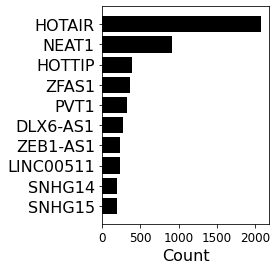

In [9]:


# heatmap shows the amount of evidence for each hallmark

evidence = heatmap.sum(axis = 1)
evidence = evidence.sort_values()
evidence.index = evidence.index.str.upper() # lncRNA names to uppercase
evidence = evidence.tail(10) # take lncRNAs with most amount of evidence

plt.figure(figsize = (3,4))
ax = plt.barh(width = evidence, y = evidence.index, color = (0,0,0))
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Count', fontsize=16)
plt.savefig('top_10_lncRNAs_with_most_evidence.svg', bbox_inches = 'tight')



In [10]:
all_lncRNAs_df

,lncRNA,num_up_regulated,num_down_regulated,Normal_mean,BLCA_mean,BRCA_mean,COAD_mean,ESCA_mean,HNSC_mean,KIRC_mean,...,EMT,immun,cell cycle progression,oncogen,tumor suppress,growth arrest,metaboli,autophag,angiogenesis,prognosis
0,fendrr,0.0,17.0,0.150327,0.233614,0.125174,0.497928,0.345182,0.311720,0.093627,...,0.0,2.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0,1.0
1,mir155hg,5.0,2.0,0.018837,0.032774,0.053177,0.022943,0.023924,0.021854,0.018237,...,2.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
2,hoxa10-as,3.0,0.0,0.083531,0.168411,0.215638,0.045964,0.061428,0.056320,0.055679,...,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,linc01096,1.0,0.0,0.100355,0.086079,0.141014,0.110568,0.108286,0.088498,0.115660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,znf750,0.0,4.0,0.872749,0.575780,0.622619,0.764322,0.806261,0.793589,0.945498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,hoxa13,3.0,0.0,0.204304,0.155723,0.332622,0.120417,0.237853,0.321501,0.214470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,linc00261,2.0,15.0,0.387776,0.268930,0.295492,0.445194,0.387731,0.372505,0.353937,...,11.0,4.0,0.0,5.0,6.0,0.0,0.0,0.0,1.0,1.0
7,frmd6-as2,0.0,1.0,0.756222,0.502673,0.491804,0.489633,0.524451,0.517959,0.900883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,linc00174,5.0,0.0,0.056662,0.212445,0.062021,0.080919,0.126946,0.106807,0.044353,...,0.0,2.0,0.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0
9,hoxc-as1,2.0,0.0,0.052598,0.145170,0.039105,0.408551,0.051315,0.138784,0.033449,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
all_lncRNAs_df['num_regulated_class'] = 0
all_lncRNAs_df['num_regulated_class'] = all_lncRNAs_df['num_regulated_class'].where(~((all_lncRNAs_df['num_up_regulated'] == 0) & (all_lncRNAs_df['num_down_regulated'] > 0)), other='down')
all_lncRNAs_df['num_regulated_class'] = all_lncRNAs_df['num_regulated_class'].where(~((all_lncRNAs_df['num_up_regulated'] > 0) & (all_lncRNAs_df['num_down_regulated'] > 0)), other='mixed')
all_lncRNAs_df['num_regulated_class'] = all_lncRNAs_df['num_regulated_class'].where(~((all_lncRNAs_df['num_up_regulated'] > 0) & (all_lncRNAs_df['num_down_regulated'] == 0)), other='up')
all_lncRNAs_df['num_regulated_class'] = all_lncRNAs_df['num_regulated_class'].where(~((all_lncRNAs_df['num_up_regulated'] == 0) & (all_lncRNAs_df['num_down_regulated'] == 0)), other='none')


### Now plotting a heatmap with the methylation values

In [12]:
ct = 'BRCA'
# heatmap
mean_met = all_lncRNAs_df[ct + '_mean']
regulation = all_lncRNAs_df['num_regulated_class']




for lncRNA, mean in zip(heatmap.index, mean_met):
    for h in heatmap.columns:
        if heatmap.loc[lncRNA, h] != 0:
            heatmap.loc[lncRNA, h] = mean
        else:
            heatmap.loc[lncRNA, h] = -0.01 # no data goes to -0.01
        


# taking out lncRNAs with no hallmark data
regulation = regulation[((heatmap != -0.01).sum(axis = 1) != 0).values]
heatmap = heatmap.loc[(heatmap != -0.01).sum(axis = 1) != 0, :]

heatmap

,methylat,metasta,prolifer,invasi,apoptosis,migrat,growth,cell cycle arrest,cell cycle,EMT,immun,tumor suppress,angiogenesis,oncogen,cell cycle progression,autophag,metaboli,prognosis
lncRNA,,,,,,,,,,,,,,,,,,
fendrr,0.125174,0.125174,0.125174,0.125174,0.125174,0.125174,0.125174,-0.010000,0.125174,-0.010000,0.125174,0.125174,-0.010000,0.125174,-0.010000,-0.010000,-0.010000,0.125174
mir155hg,0.053177,0.053177,0.053177,0.053177,0.053177,0.053177,0.053177,0.053177,0.053177,0.053177,0.053177,0.053177,-0.010000,0.053177,-0.010000,-0.010000,-0.010000,-0.010000
hoxa10-as,-0.010000,0.215638,0.215638,0.215638,0.215638,-0.010000,0.215638,-0.010000,0.215638,0.215638,-0.010000,-0.010000,-0.010000,0.215638,-0.010000,-0.010000,-0.010000,-0.010000
linc01096,-0.010000,-0.010000,-0.010000,0.141014,0.141014,0.141014,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
znf750,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,0.622619,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
hoxa13,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,0.332622,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
linc00261,0.295492,0.295492,0.295492,0.295492,0.295492,0.295492,0.295492,0.295492,0.295492,0.295492,0.295492,0.295492,0.295492,0.295492,-0.010000,-0.010000,-0.010000,0.295492
frmd6-as2,-0.010000,-0.010000,-0.010000,0.491804,-0.010000,0.491804,0.491804,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
linc00174,-0.010000,-0.010000,0.062021,0.062021,0.062021,0.062021,0.062021,-0.010000,-0.010000,-0.010000,0.062021,0.062021,-0.010000,0.062021,-0.010000,-0.010000,0.062021,-0.010000


Text(0.5, 1.0, 'Beta values of lncRNAs found with hallmark info')

[5, 2, 3, 4, 8, 6, 13, 9, 10, 11, 15, 7, 12, 16, 14, 17, 0, 1]

,0,hallmark
5,85,migrat
2,94,prolifer
3,88,invasi
4,67,apoptosis
8,45,cell cycle
6,72,growth
13,56,oncogen
9,41,EMT
10,43,immun
11,29,tumor suppress


<BarContainer object of 18 artists>

[Text(0, 0, ''),
 Text(0, 1, ''),
 Text(0, 2, ''),
 Text(0, 3, ''),
 Text(0, 4, ''),
 Text(0, 5, ''),
 Text(0, 6, ''),
 Text(0, 7, ''),
 Text(0, 8, ''),
 Text(0, 9, ''),
 Text(0, 10, ''),
 Text(0, 11, ''),
 Text(0, 12, ''),
 Text(0, 13, ''),
 Text(0, 14, ''),
 Text(0, 15, ''),
 Text(0, 16, ''),
 Text(0, 17, '')]

(-0.5, 17.5)

[Text(1, 0.5, 'migrat'),
 Text(1, 1.5, 'prolifer'),
 Text(1, 2.5, 'invasi'),
 Text(1, 3.5, 'apoptosis'),
 Text(1, 4.5, 'cell cycle'),
 Text(1, 5.5, 'growth'),
 Text(1, 6.5, 'oncogen'),
 Text(1, 7.5, 'EMT'),
 Text(1, 8.5, 'immun'),
 Text(1, 9.5, 'tumor suppress'),
 Text(1, 10.5, 'autophag'),
 Text(1, 11.5, 'cell cycle arrest'),
 Text(1, 12.5, 'angiogenesis'),
 Text(1, 13.5, 'metaboli'),
 Text(1, 14.5, 'cell cycle progression'),
 Text(1, 15.5, 'prognosis'),
 Text(1, 16.5, 'methylat'),
 Text(1, 17.5, 'metasta')]

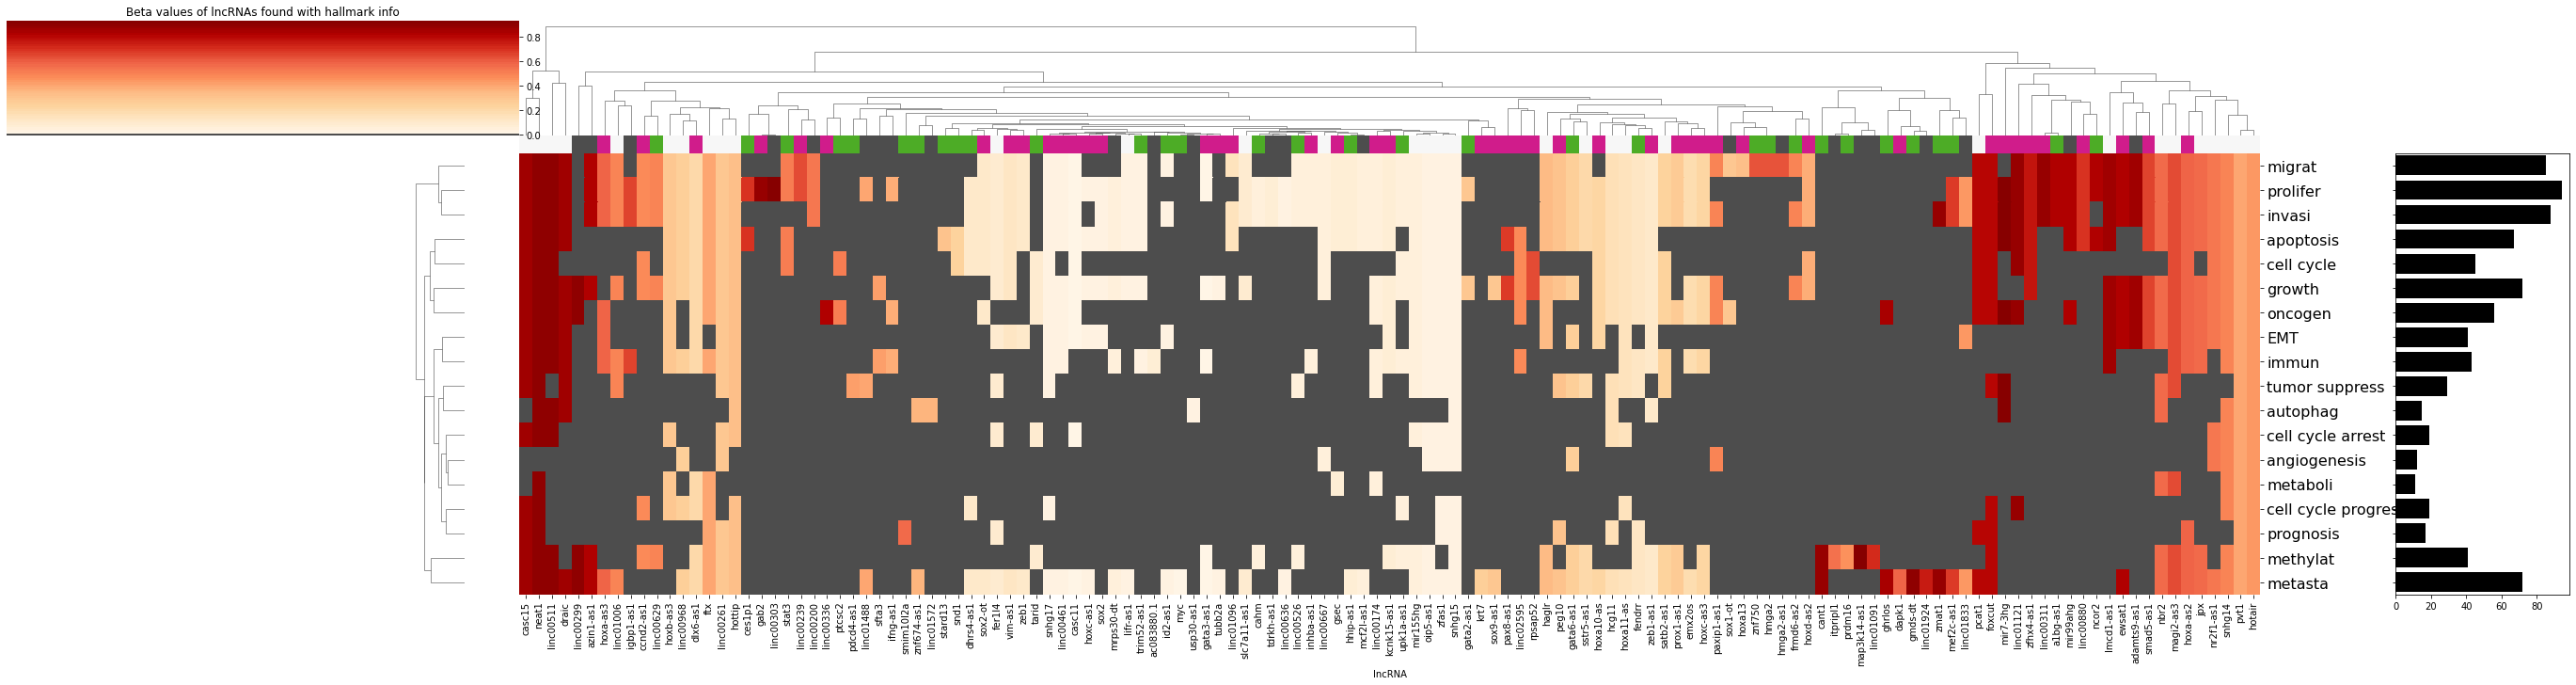

In [13]:
cols = [(0.3,0.3,0.3)] + sb.color_palette('OrRd', 50)
cmap = {k:v for k, v in zip([-0.01] + list(np.linspace(0, 1)), cols)}

# cols2 = sb.color_palette('Blues', 101)
# cmap2 = {round(k, 2):v for k, v in zip(np.linspace(0, 1, 101), cols2)}
# cmap2

# colours for the expression regulation bar
regulation[regulation == 0] = 'none'
regulation_colors = ['#d01c8b' if reg == 'up' else '#4dac26' if reg == 'down' else '#f7f7f7' if reg == 'mixed' else (0.3, 0.3, 0.3) for reg in regulation]
                    # pink for up, green for down, white for mixed, grey for no data

cg = sb.clustermap(heatmap.transpose(), cmap = cols, figsize = (40, 10), method='complete', xticklabels=1, col_colors=regulation_colors)
plt.title("Beta values of lncRNAs found with hallmark info")

labs = plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), fontsize=12)


# get histogram of popular hallmarks (counts only 1 per lncRNA, even if that lncRNA was found with that hallmark in multiple sources)
row_hist = pd.DataFrame((heatmap != -0.01).sum(axis = 0))
row_hist['hallmark'] = row_hist.index
row_hist.index = range(len(row_hist))

wanted_order = cg.dendrogram_row.reordered_ind
wanted_order
row_hist = row_hist.loc[wanted_order]
row_hist

# plt.barh(width = row_hist[0], y = row_hist['hallmark'])
 # does it in reverse order as to what we want, so we invert it



# trying to add hallmark histogram - from https://stackoverflow.com/a/49583463

#enlarge figure
cg.fig.set_size_inches(40,10)
# make some space to the right in the figure
cg.gs.update(right=0.95)
# divide existing axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(cg.ax_heatmap)
divider2 = make_axes_locatable(cg.ax_col_dendrogram)
divider3 = make_axes_locatable(cg.ax_col_colors)

# create new axes for bar plot 
ax = divider.append_axes("right", size="10%", pad=2)
# create empty space of same size as bar plot axes (don't use this space)
nax = divider2.new_horizontal(size="10%", pad=2)
nax = divider3.new_horizontal(size="10%", pad=2)

# plot bar plot in ax
ax.barh(width = row_hist[0], y = row_hist['hallmark'], color = 'black')
# ax.barh(np.arange(len(target)), df['cyl'].values[ind])
ax.set_yticklabels([])
ax.set_ylim(-0.5,len(row_hist.index)-.5)
ax.invert_yaxis()



# change width of row dendrogram
hm = cg.ax_heatmap.get_position()
cg.ax_heatmap.set_position([hm.x0, hm.y0, hm.width, hm.height])
row = cg.ax_row_dendrogram.get_position()
cg.ax_row_dendrogram.set_position([row.x0+0.15, row.y0, row.width*0.1, row.height])

cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_ymajorticklabels(), fontsize = 16)

plt.savefig('lncRNA_and_hallmark_betas_heatmap_combined.pdf')
plt.savefig('lncRNA_and_hallmark_betas_heatmap_combined.svg')





# Now adding differential expression data from my differential analysis

In [14]:
# read in differential expression data
# this is BRCA differential expression
diff_exp = pd.read_csv('../../differential_expression/result.csv', index_col=0)
diff_exp

diff_exp['external_gene_name'] = diff_exp['external_gene_name'].str.lower()

df = pd.DataFrame(heatmap.index)
df = df.merge(diff_exp[['gene', 'log2FoldChange', 'padj', 'external_gene_name']], how = 'left', left_on = 'lncRNA', right_on = 'external_gene_name')

df

np.mean(df['lncRNA'] == heatmap.index) # should be 1 if in same order

# so these cols should be in same column order as heatmap:
diff_exp_lfc = df['log2FoldChange']
diff_exp_padj = df['padj']

diff_exp_lfc[np.array(diff_exp_padj) > 0.05] = np.nan
diff_exp_padj[diff_exp_padj > 0.05] = np.nan # set non significants to nan so they arn't coloured




,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,external_gene_name
1,ENSG00000000003,3115.041981,-0.611447,0.092606,-6.602694,4.037516e-11,1.457495e-10,TSPAN6
2,ENSG00000000005,136.856687,-3.909298,0.236718,-16.514578,2.881702e-61,7.714602e-60,TNMD
3,ENSG00000000419,2313.733929,0.445617,0.055542,8.023084,1.031225e-15,4.887171e-15,DPM1
4,ENSG00000000457,1896.550733,0.384473,0.055683,6.904706,5.030739e-12,1.929053e-11,SCYL3
5,ENSG00000000460,787.849254,1.330944,0.072350,18.395840,1.418465e-75,5.922093e-74,C1orf112
...,...,...,...,...,...,...,...,...
43778,ENSG00000281904,0.508815,-1.125534,0.258488,-4.354303,1.334908e-05,3.092155e-05,AC233263.6
43779,ENSG00000281909,0.723097,0.185811,0.242335,0.766753,4.432285e-01,5.178033e-01,HERC2P7
43780,ENSG00000281910,0.600099,-0.352583,0.507830,-0.694293,4.874985e-01,5.614024e-01,SNORA50A
43781,ENSG00000281912,98.652120,0.169787,0.090486,1.876388,6.060200e-02,8.725196e-02,LINC01144


,lncRNA,gene,log2FoldChange,padj,external_gene_name
0,fendrr,ENSG00000268388,0.887691,2.743569e-03,fendrr
1,mir155hg,ENSG00000234883,1.136625,6.898136e-18,mir155hg
2,hoxa10-as,ENSG00000253187,-0.812650,5.925328e-06,hoxa10-as
3,linc01096,ENSG00000246095,2.410930,1.301505e-27,linc01096
4,znf750,ENSG00000141579,-0.239819,9.210983e-02,znf750
5,hoxa13,ENSG00000106031,0.265643,2.579050e-01,hoxa13
6,linc00261,ENSG00000259974,1.174418,7.354110e-02,linc00261
7,frmd6-as2,ENSG00000258537,-1.339030,8.038895e-07,frmd6-as2
8,linc00174,ENSG00000179406,0.314996,1.687888e-04,linc00174
9,hoxc-as1,ENSG00000250451,-1.018198,3.687511e-18,hoxc-as1


1.0

/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
df[df['external_gene_name'] == 'hoxc-as3']

df.sort_values('padj')

,lncRNA,gene,log2FoldChange,padj,external_gene_name
22,hoxc-as3,ENSG00000251151,3.452446,4.648764e-59,hoxc-as3


,lncRNA,gene,log2FoldChange,padj,external_gene_name
53,magi2-as3,ENSG00000234456,-2.206641,7.410268e-120,magi2-as3
12,linc00968,ENSG00000246430,-3.797287,9.184896e-95,linc00968
73,itpripl1,ENSG00000198885,-2.358551,1.576675e-83,itpripl1
16,emx2os,ENSG00000229847,-2.365807,2.900531e-70,emx2os
29,mef2c-as1,ENSG00000248309,-2.219270,1.697366e-67,mef2c-as1
39,linc00511,ENSG00000227036,2.928745,1.837924e-64,linc00511
88,cant1,ENSG00000171302,1.301004,1.154534e-62,cant1
67,linc00667,ENSG00000263753,-1.086351,4.594739e-61,linc00667
22,hoxc-as3,ENSG00000251151,3.452446,4.648764e-59,hoxc-as3
117,tdrkh-as1,ENSG00000203288,1.324377,2.848922e-53,tdrkh-as1


4.132186

-3.7972870000000003

Text(0.5, 1.0, 'Beta value')

<BarContainer object of 18 artists>

[Text(0, 0, ''),
 Text(0, 1, ''),
 Text(0, 2, ''),
 Text(0, 3, ''),
 Text(0, 4, ''),
 Text(0, 5, ''),
 Text(0, 6, ''),
 Text(0, 7, ''),
 Text(0, 8, ''),
 Text(0, 9, ''),
 Text(0, 10, ''),
 Text(0, 11, ''),
 Text(0, 12, ''),
 Text(0, 13, ''),
 Text(0, 14, ''),
 Text(0, 15, ''),
 Text(0, 16, ''),
 Text(0, 17, '')]

(-0.5, 17.5)

/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.


[Text(1, 0.5, 'migration'),
 Text(1, 1.5, 'proliferation'),
 Text(1, 2.5, 'invasion'),
 Text(1, 3.5, 'apoptosis'),
 Text(1, 4.5, 'cell cycle'),
 Text(1, 5.5, 'growth'),
 Text(1, 6.5, 'oncogenesis'),
 Text(1, 7.5, 'EMT'),
 Text(1, 8.5, 'immunity'),
 Text(1, 9.5, 'tumor supression'),
 Text(1, 10.5, 'autophagy'),
 Text(1, 11.5, 'cell cycle arrest'),
 Text(1, 12.5, 'angiogenesis'),
 Text(1, 13.5, 'metabolism'),
 Text(1, 14.5, 'cell cycle progression'),
 Text(1, 15.5, 'prognosis'),
 Text(1, 16.5, 'methylation'),
 Text(1, 17.5, 'metastatic')]

Text(0.5, 1.0, 'Log fold change')

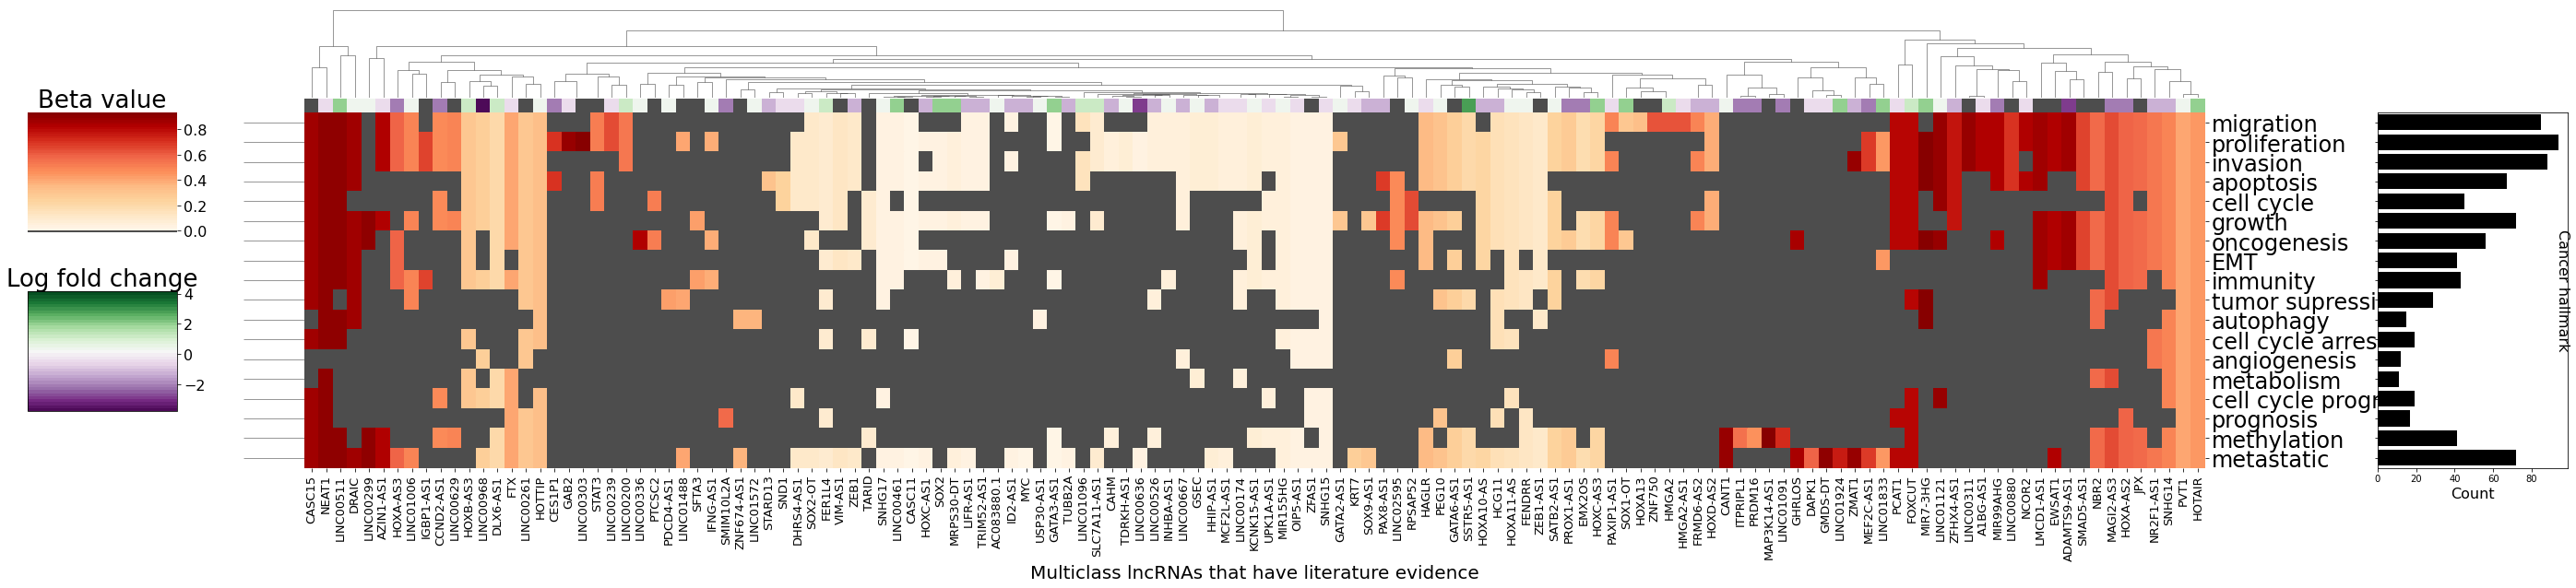

In [26]:
# now repeating lots of the code above to make the heatmap, but with a diff exp column this time

# diff_exp_colors = ['#d01c8b' if reg == 'up' else '#4dac26' if reg == 'down' else '#f7f7f7' if reg == 'mixed' else (0.3, 0.3, 0.3) for reg in regulation]


diff_exp_lpadj = -np.log10(diff_exp_padj)
max(diff_exp_lfc)
min(diff_exp_lfc)



cols2 = sb.color_palette('PRGn', int((np.nanmax(diff_exp_lfc) - np.nanmin(diff_exp_lfc)+1+1)*4))
# cols2 = cols2[0:int(max(diff_exp_lpadj)+1)]

cmap2 = {k:v for k, v in zip(np.linspace(int(np.nanmin(diff_exp_lfc)-1), int(np.nanmax(diff_exp_lfc)+1), len(cols2)-2), cols2)}
padj_colours = [(0.3,0.3,0.3) if np.isnan(p) else cmap2[np.round(p, 0)] for p in diff_exp_lfc]

heatmap.index = heatmap.index.str.upper() # put genes in upper case

cg = sb.clustermap(heatmap.transpose(), cmap = cols, figsize = (45, 7), method='complete', xticklabels=1, col_colors=padj_colours, rasterized=True) # rasterrized = True to get rid of cell borders when saving: https://stackoverflow.com/a/27056296
plt.title("Beta value")
plt.rcParams['axes.titlesize'] = 26

labs = plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), fontsize=20)

labs2 = plt.setp(cg.cax.get_ymajorticklabels(), fontsize=16)
# labs2 = plt.setp(cg.cax.get_title(), fontsize=14)

xticks = cg.ax_heatmap.set_xticklabels(cg.ax_heatmap.get_xticklabels(), rotation = 90, horizontalalignment='center', fontsize = 13)
xlab = cg.ax_heatmap.set_xlabel('Multiclass lncRNAs that have literature evidence', fontsize=20) # cg.ax_heatmap.get_xlabel()

#enlarge figure
cg.fig.set_size_inches(45,9) # (45, 7)
# make some space to the right in the figure
cg.gs.update(right=0.95)
# divide existing axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(cg.ax_heatmap)
divider2 = make_axes_locatable(cg.ax_col_dendrogram)
divider3 = make_axes_locatable(cg.ax_col_colors)

# create new axes for bar plot 
ax = divider.append_axes("right", size="10%", pad=2.6)
# create empty space of same size as bar plot axes (don't use this space)
nax = divider2.new_horizontal(size="10%", pad=2.6)
nax = divider3.new_horizontal(size="10%", pad=2.6)

# plot bar plot in ax
ax.barh(width = row_hist[0], y = row_hist['hallmark'], color = 'black')
# ax.barh(np.arange(len(target)), df['cyl'].values[ind])
ax.set_yticklabels([])
ax.set_ylim(-0.5,len(row_hist.index)-.5)
ax.invert_yaxis()
xlab = ax.set_xlabel('Count', fontsize = 16)
ylab = ax.set_ylabel('Cancer hallmark', fontsize = 16, labelpad = -200, rotation = 270)




# adding second colour bar for column - from: https://stackoverflow.com/a/49440668
import matplotlib as mpl
divider = make_axes_locatable(cg.ax_row_dendrogram)

axDivY2 = divider.append_axes( 'left', size="10%", pad= 0.5)
axDivY3 = divider.append_axes( 'left', size="10%", pad= 5)
divider2 = make_axes_locatable(axDivY3)
divider2.new_vertical(size = "10%")


ax2 = axDivY2.imshow(np.array([diff_exp_lfc]),
              cmap=mpl.colors.ListedColormap(list(cols2)),
              interpolation="nearest", aspect="auto")

# turn off the axes so they aren't visible- note that you need ax.axis('off) if you have older matplotlib
axDivY2.set_axis_off()
axDivY2.set_visible(False)

# plot the colorbar on the other axes (which is on top of the one that we turned off)
cb = plt.colorbar(ax2, cax = axDivY3) ;


# change width of row dendrogram
hm = cg.ax_heatmap.get_position()
cg.ax_heatmap.set_position([hm.x0, hm.y0, hm.width, hm.height])
row = cg.ax_row_dendrogram.get_position()
cg.ax_row_dendrogram.set_position([row.x0+0.15, row.y0, row.width*0.1, row.height])

# from stem hallmarks to real words
label_mapping = {'autophag':'autophagy', 
                 'angiogenesis': 'angiogenesis', 
                 'metaboli': 'metabolism', 
                 'tumor suppress': 'tumor supression', 
                 'cell cycle arrest': 'cell cycle arrest',
                 'cell cycle progression': 'cell cycle progression',
                 'prognosis': 'prognosis',
                 'methylat': 'methylation',
                 'EMT': 'EMT',
                 'immun': 'immunity',
                 'metasta':'metastatic',
                 'migrat':'migration',
                 'prolifer': 'proliferation',
                 'invasi': 'invasion',
                 'oncogen':'oncogenesis',
                 'growth':'growth',
                 'apoptosis':'apoptosis',
                 'cell cycle':'cell cycle'}
labels = [item.get_text() for item in list(cg.ax_heatmap.get_yticklabels())]
labels = [label_mapping[l] for l in labels]

cg.ax_heatmap.set_yticklabels(labels, fontsize = 24)

cg.cax.set_position(pos = [0.1, 0.6, 0.05, 0.2]) # moving the colour bar
axDivY3.set_position(pos = [0.1, 0.3, 0.05, 0.22])
axDivY3.set_title('Log fold change')
# axDivY3.set_xticklabels(axDivY3.get_xticklabels(), fontsize = 16)
cb.ax.tick_params(labelsize=16)


plt.savefig('lncRNA_and_hallmark_betas_heatmap_combined_with_diff_exp.pdf', bbox_inches='tight')
plt.savefig('lncRNA_and_hallmark_betas_heatmap_combined_with_diff_exp.svg', bbox_inches='tight')


